## Introduction

- Import the Libraries

In [75]:
import pandas as pd
import numpy as np
import os
from pathlib import Path
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import kstest, norm
import scipy.stats as stats
from scipy.fft import fft, fftfreq
from scipy.signal import find_peaks
from scipy.stats import kruskal
from scipy.stats import shapiro
from scipy import stats
from scipy.fft import rfft, rfftfreq
from scipy.stats import zscore
import random
from collections import Counter
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report
)

# from scipy.ndimage import gaussian_filter1d

## 2 - Download the Data

- Download the data

In [76]:
BASE_PATH = os.path.join(os.getcwd(), "FORTH_TRACE_DATASET-master/FORTH_TRACE_DATASET-master")

def load_data(participant_id, device_id, base_path=BASE_PATH):
    filepath = os.path.join(base_path, f"part{participant_id}", f"part{participant_id}dev{device_id}.csv")
    data = np.genfromtxt(filepath, delimiter=',')
    return data



- Loading the data from only device 1 for each individual 

- [column 1: device ID,

   column 2: accelerometer x,

   column 3: accelerometer y,
   
   column 4: accelerometer z,
   
   column 5: gyroscope x,
   
   column 6: gyroscope y,
   
   column 7: gyroscope z,
   
   column 8: magnetometer x,
   
   column 9: magnetometer y,
   
   column 10: magnetometer z,
   
   column 11: TimeStamp,
   
   column 12: Activity Label]

- Each individual has different number of data (individuals[i])

- Number of individuals: 15

- Each individual has their respective TimeStamps start and end

In [77]:
individuals = []
for i in range(15): 
    data = load_data(i, 1)
    individuals.append(data)

print("Número de arrays: ",len(individuals),"\n")
print("Arrays: ",individuals)

Número de arrays:  15 

Arrays:  [array([[ 1.0000e+00, -1.8650e+00,  9.3890e+00, ...,  1.0134e+00,
         5.0589e+02,  1.0000e+00],
       [ 1.0000e+00, -1.7963e+00,  9.3742e+00, ...,  1.0000e+00,
         5.2542e+02,  1.0000e+00],
       [ 1.0000e+00, -1.8696e+00,  9.3000e+00, ...,  1.0156e+00,
         5.4495e+02,  1.0000e+00],
       ...,
       [ 1.0000e+00, -2.1324e+00,  9.3112e+00, ...,  5.4343e-01,
         1.0379e+06,  1.0000e+00],
       [ 1.0000e+00, -2.1327e+00,  9.3110e+00, ...,  5.5234e-01,
         1.0380e+06,  1.0000e+00],
       [ 1.0000e+00, -2.1334e+00,  9.2982e+00, ...,  5.4120e-01,
         1.0380e+06,  1.0000e+00]], shape=(53120, 12)), array([[ 1.0000e+00, -1.1173e+00,  9.6762e+00, ...,  4.6771e-02,
         8.7930e+02,  1.0000e+00],
       [ 1.0000e+00, -1.2130e+00,  9.7239e+00, ...,  5.7906e-02,
         8.9883e+02,  1.0000e+00],
       [ 1.0000e+00, -1.1892e+00,  9.7119e+00, ...,  6.4588e-02,
         9.1837e+02,  1.0000e+00],
       ...,
       [ 1.0000e+00, 

- Each array has different sizes, these is expected because they used continuos sensors

In [78]:
for i in range(len(individuals)):
    print(f"Tamanho do array {i}: ",len(individuals[i]))

Tamanho do array 0:  53120
Tamanho do array 1:  53376
Tamanho do array 2:  53248
Tamanho do array 3:  53268
Tamanho do array 4:  53120
Tamanho do array 5:  52861
Tamanho do array 6:  53632
Tamanho do array 7:  52480
Tamanho do array 8:  52992
Tamanho do array 9:  52480
Tamanho do array 10:  51456
Tamanho do array 11:  52864
Tamanho do array 12:  53120
Tamanho do array 13:  52992
Tamanho do array 14:  53248


## 3 - Outliers Analysis and Handling

### 3.1 - Boxplot for each activity 

- Calculation of each vector module

• Column 2: accelerometer x

• Column 3: accelerometer y

• Column 4: accelerometer z

• Column 5: gyroscope x

• Column 6: gyroscope y

• Column 7: gyroscope z

• Column 8: magnetometer x

• Column 9: magnetometer y

• Column 10: magnetometer z

• Column 12: Activity Label

In [79]:
activities = {1:[],2:[],3:[],4:[]}

for i in range(len(individuals)):
    data = individuals[i]  
    for row in data:
        label = int(row[11])  
        if label in activities:
            accelerometer  = np.sqrt(row[1]**2 + row[2]**2 + row[3]**2)
            gyroscope = np.sqrt(row[4]**2 + row[5]**2 + row[6]**2)
            magnetometer  = np.sqrt(row[7]**2 + row[8]**2 + row[9]**2)

            activities[label].append((accelerometer,gyroscope,magnetometer))

print("Estrutura de activities: ",len(activities))

Estrutura de activities:  4


- Each activity has different data sizes

In [80]:
for key in activities:
    print(f"Número de dados da atividade {key}: ",len(activities[key]))

Número de dados da atividade 1:  162125
Número de dados da atividade 2:  85632
Número de dados da atividade 3:  83584
Número de dados da atividade 4:  141342


- Boxplot of sensors/activity

In [81]:
accelerometer_activity = []
gyroscope_activity = []
magnetometer_activity = []

for act in range(1, 5):
    acceloremeter_values  = [x[0] for x in activities[act]]
    gyroscope_values = [x[1] for x in activities[act]]
    magnetometer_values  = [x[2] for x in activities[act]]

    accelerometer_activity.append(acceloremeter_values)
    gyroscope_activity.append(gyroscope_values)
    magnetometer_activity.append(magnetometer_values)

print("Tamanho dos dados do accelerometro: ",len(accelerometer_activity))
print("Tamanho dos dados do giroscópio: ",len(gyroscope_activity))
print("Tamanho dos dados do magnetómetro: ",len(magnetometer_activity))

Tamanho dos dados do accelerometro:  4
Tamanho dos dados do giroscópio:  4
Tamanho dos dados do magnetómetro:  4


- Each row of each activity for the accelerometer_activity has the (ax,ay,az) coordinates but all are consecutive, so i need to access three in three to be like activities dictionary

In [82]:
lenghts_acc= []
for i in range(len(accelerometer_activity)):
    lenghts_acc.append(len(accelerometer_activity[i]))

print(lenghts_acc)

[162125, 85632, 83584, 141342]


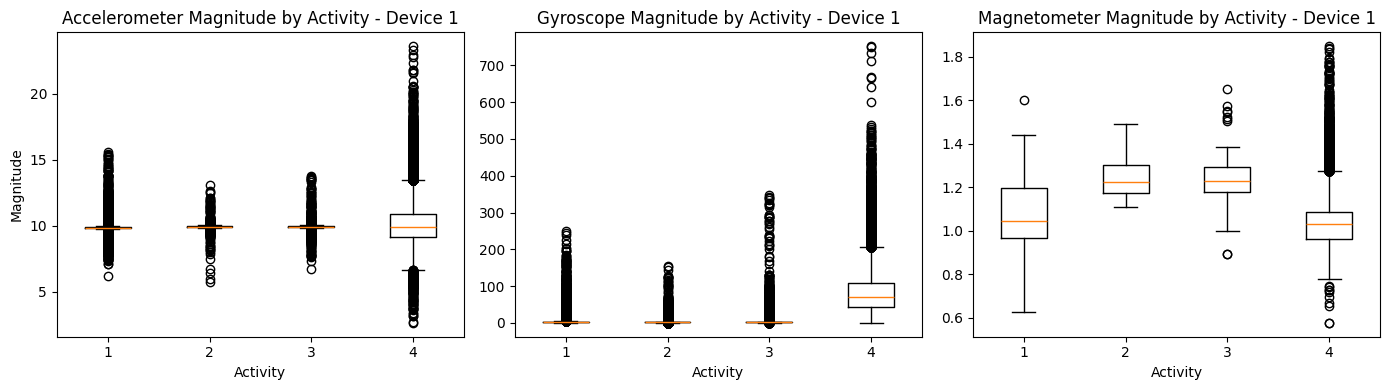

In [83]:
plt.figure(figsize=(14, 4))

plt.subplot(1, 3, 1)
plt.boxplot(accelerometer_activity)
plt.title("Accelerometer Magnitude by Activity - Device 1")
plt.xlabel("Activity")
plt.ylabel("Magnitude")

plt.subplot(1, 3, 2)
plt.boxplot(gyroscope_activity)
plt.title("Gyroscope Magnitude by Activity - Device 1")
plt.xlabel("Activity")

plt.subplot(1, 3, 3)
plt.boxplot(magnetometer_activity)
plt.title("Magnetometer Magnitude by Activity - Device 1")
plt.xlabel("Activity")

plt.tight_layout()
plt.show()


### 3.2 - Analyse and Comment the Density of Outliers
- IQR Implementation

- Sort the lists of each sensor

In [84]:
accelerometer_activity_sorted = []

for i in range(len(accelerometer_activity)):
    sorted_values = sorted(accelerometer_activity[i])
    accelerometer_activity_sorted.append(sorted_values)

gyroscope_activity_sorted = []

for i in range(len(gyroscope_activity)):
    sorted_values = sorted(gyroscope_activity[i])
    gyroscope_activity_sorted.append(sorted_values)


magnetometer_activity_sorted = []

for i in range(len(magnetometer_activity)):
    sorted_values = sorted(magnetometer_activity[i])
    magnetometer_activity_sorted.append(sorted_values)

- Lenght of each sensor list

In [85]:
len_accelerometer = []

for i in range(len(accelerometer_activity_sorted)):
    len_accelerometer.append(len(accelerometer_activity_sorted[i]))


len_gyroscope = []

for i in range(len(gyroscope_activity_sorted)):
    len_gyroscope.append(len(gyroscope_activity_sorted[i]))


len_magnetometer = []

for i in range(len(magnetometer_activity_sorted)):
    len_magnetometer.append(len(magnetometer_activity_sorted[i]))


print("Accelerometer: ",len_accelerometer)
print("Gyroscope: ",len_gyroscope)
print("Magnetometer: ",len_magnetometer)

Accelerometer:  [162125, 85632, 83584, 141342]
Gyroscope:  [162125, 85632, 83584, 141342]
Magnetometer:  [162125, 85632, 83584, 141342]


In [86]:
Q1_acc = []
Q3_acc = []

for i in range(len(accelerometer_activity_sorted)):
    values = accelerometer_activity_sorted[i]     
    n = len(values)
    pos_Q1 = 0.25 * (n + 1)
    pos_Q3 = 0.75 * (n + 1)

    lower_Q1 = int(pos_Q1) - 1
    upper_Q1 = lower_Q1 + 1
    lower_Q3 = int(pos_Q3) - 1
    upper_Q3 = lower_Q3 + 1

    Q1_val = values[lower_Q1] + (pos_Q1 - int(pos_Q1)) * (values[upper_Q1] - values[lower_Q1])
    Q3_val = values[lower_Q3] + (pos_Q3 - int(pos_Q3)) * (values[upper_Q3] - values[lower_Q3])

    Q1_acc.append(Q1_val)
    Q3_acc.append(Q3_val)


Q1_gyr = []
Q3_gyr = []

for i in range(len(gyroscope_activity_sorted)):
    values = gyroscope_activity_sorted[i]
    n = len(values)
    pos_Q1 = 0.25 * (n + 1)
    pos_Q3 = 0.75 * (n + 1)

    lower_Q1 = int(pos_Q1) - 1
    upper_Q1 = lower_Q1 + 1
    lower_Q3 = int(pos_Q3) - 1
    upper_Q3 = lower_Q3 + 1

    Q1_val = values[lower_Q1] + (pos_Q1 - int(pos_Q1)) * (values[upper_Q1] - values[lower_Q1])
    Q3_val = values[lower_Q3] + (pos_Q3 - int(pos_Q3)) * (values[upper_Q3] - values[lower_Q3])

    Q1_gyr.append(Q1_val)
    Q3_gyr.append(Q3_val)


Q1_mag = []
Q3_mag = []

for i in range(len(magnetometer_activity_sorted)):
    values = magnetometer_activity_sorted[i]
    n = len(values)
    pos_Q1 = 0.25 * (n + 1)
    pos_Q3 = 0.75 * (n + 1)

    lower_Q1 = int(pos_Q1) - 1
    upper_Q1 = lower_Q1 + 1
    lower_Q3 = int(pos_Q3) - 1
    upper_Q3 = lower_Q3 + 1

    Q1_val = values[lower_Q1] + (pos_Q1 - int(pos_Q1)) * (values[upper_Q1] - values[lower_Q1])
    Q3_val = values[lower_Q3] + (pos_Q3 - int(pos_Q3)) * (values[upper_Q3] - values[lower_Q3])

    Q1_mag.append(Q1_val)
    Q3_mag.append(Q3_val)


In [87]:
print("Q1 (acc): ",Q1_acc," Q3 (acc): ",Q3_acc)
print("Q1 (gyr): ",Q1_gyr," Q3 (gyr): ",Q3_gyr)
print("Q1 (mag): ",Q1_mag," Q3 (mag): ",Q3_mag)

Q1 (acc):  [np.float64(9.819646410640253), np.float64(9.901181647157069), np.float64(9.883672002095173), np.float64(9.179633085362125)]  Q3 (acc):  [np.float64(9.870302200687677), np.float64(9.969197738113133), np.float64(9.940777034517975), np.float64(10.89105599130694)]
Q1 (gyr):  [np.float64(1.3965113863838314), np.float64(1.1622591618481655), np.float64(1.2700557673988524), np.float64(42.23248137752593)]  Q3 (gyr):  [np.float64(2.6834860928961377), np.float64(1.5489879470143055), np.float64(1.9141148821648422), np.float64(107.80765056800097)]
Q1 (mag):  [np.float64(0.9656947954601289), np.float64(1.1714641708767508), np.float64(1.1757712458930947), np.float64(0.9603195538311597)]  Q3 (mag):  [np.float64(1.1962697774540487), np.float64(1.301677157093859), np.float64(1.2948422088894886), np.float64(1.0854070396053244)]


- IQR (lower and upper interval) for each sensor and each activity

In [88]:
k = 1.5 

IQR_acc = [Q3_acc[i] - Q1_acc[i] for i in range(len(Q1_acc))]
lower_acc = [Q1_acc[i] - k * IQR_acc[i] for i in range(len(IQR_acc))]
upper_acc = [Q3_acc[i] + k * IQR_acc[i] for i in range(len(IQR_acc))]

IQR_gyr = [Q3_gyr[i] - Q1_gyr[i] for i in range(len(Q1_gyr))]
lower_gyr = [Q1_gyr[i] - k * IQR_gyr[i] for i in range(len(IQR_gyr))]
upper_gyr = [Q3_gyr[i] + k * IQR_gyr[i] for i in range(len(IQR_gyr))]

IQR_mag = [Q3_mag[i] - Q1_mag[i] for i in range(len(Q1_mag))]
lower_mag = [Q1_mag[i] - k * IQR_mag[i] for i in range(len(IQR_mag))]
upper_mag = [Q3_mag[i] + k * IQR_mag[i] for i in range(len(IQR_mag))]


In [89]:
print(lower_acc,upper_acc)
print(lower_gyr,upper_gyr)
print(lower_mag,upper_mag)

[np.float64(9.743662725569116), np.float64(9.799157510722972), np.float64(9.798014453460969), np.float64(6.612498726444903)] [np.float64(9.946285885758812), np.float64(10.071221874547229), np.float64(10.026434583152177), np.float64(13.458190350224163)]
[np.float64(-0.533950673384628), np.float64(0.5821659840989554), np.float64(0.30396709524986776), np.float64(-56.13027240818663)] [np.float64(4.613948152664597), np.float64(2.1290811247635157), np.float64(2.8802035543138267), np.float64(206.17040435371354)]
[np.float64(0.6198323224692492), np.float64(0.9761446915510885), np.float64(0.9971648013985037), np.float64(0.7726883251699128)] [np.float64(1.5421322504449284), np.float64(1.4969966364195213), np.float64(1.4734486533840796), np.float64(1.2730382682665713)]


Points that were classificated as outliers

In [90]:
outliers_acc = []

for i, values in enumerate(accelerometer_activity_sorted):
    outliers_i = [v for v in values if v < lower_acc[i] or v > upper_acc[i]]
    outliers_acc.append(outliers_i)

outliers_gyr = []
for i, values in enumerate(gyroscope_activity_sorted):
    outliers_i = [v for v in values if v < lower_gyr[i] or v > upper_gyr[i]]
    outliers_gyr.append(outliers_i)

outliers_mag = []
for i, values in enumerate(magnetometer_activity_sorted):
    outliers_i = [v for v in values if v < lower_mag[i] or v > upper_mag[i]]
    outliers_mag.append(outliers_i)

In [91]:
nr_outliers_acc = [len(outliers) for outliers in outliers_acc]
nr_outliers_gyr = [len(outliers) for outliers in outliers_gyr]
nr_outliers_mag = [len(outliers) for outliers in outliers_mag]

print("Número de outliers em acelerómetro (para cada atividade): ",nr_outliers_acc)
print("Número de outliers em giroscópio (para cada atividade): ",nr_outliers_gyr)
print("Número de outliers em magnetómetro (para cada atividade): ",nr_outliers_mag)

Número de outliers em acelerómetro (para cada atividade):  [9047, 532, 3285, 4556]
Número de outliers em giroscópio (para cada atividade):  [15149, 5448, 8188, 2691]
Número de outliers em magnetómetro (para cada atividade):  [1, 0, 9, 1541]


Outliers Density
- density = (nº of points classified as outliers/nº total points)*100

In [92]:
density_accelerometer = [(nr_outliers_acc[i] / len_accelerometer[i]) * 100 for i in range(len(nr_outliers_acc))]

density_gyroscope = [(nr_outliers_gyr[i] / len_gyroscope[i]) * 100 for i in range(len(nr_outliers_gyr))]

density_magnetometer = [(nr_outliers_mag[i] / len_magnetometer[i]) * 100 for i in range(len(nr_outliers_mag))]

print("Densidade de outliers do acelerómetro: ",density_accelerometer)
print("Densidade de outliers do giroscópio: ",density_gyroscope)
print("Densidade de outliers do magnetómetro: ",density_magnetometer)

Densidade de outliers do acelerómetro:  [5.5802621434078645, 0.6212630792227205, 3.930178024502297, 3.223387245121762]
Densidade de outliers do giroscópio:  [9.34402467232074, 6.362107623318386, 9.796133231240429, 1.9038926858258691]
Densidade de outliers do magnetómetro:  [0.0006168080185042406, 0.0, 0.01076761102603369, 1.0902633329088312]


### 3.3 - Z-Score Implementation

In [93]:
def zscore_sensor(sensor_data, k=3):

    z_scores_sensor = []
    outliers_sensor = []
    nr_outliers = []

    for values in sensor_data:
        n = len(values)
        if n == 0:
            z_scores_sensor.append([])
            outliers_sensor.append([])
            nr_outliers.append(0)
            continue

        mean = sum(values) / n
        variance = sum((x - mean) ** 2 for x in values) / n
        std_deviation = variance ** 0.5

        if std_deviation == 0:
            z_scores_sensor.append([0] * n)
            outliers_sensor.append([])
            nr_outliers.append(0)
            continue

        z_scores = [(x - mean) / std_deviation for x in values]
        outliers = [values[i] for i, z in enumerate(z_scores) if abs(z) > k]

        z_scores_sensor.append(z_scores)
        outliers_sensor.append(outliers)
        nr_outliers.append(len(outliers))

    return z_scores_sensor, outliers_sensor, nr_outliers


- Z-Score (K=3)

In [94]:
z_acc, out_acc, nr_out_acc = zscore_sensor(accelerometer_activity_sorted, k=3)
z_gyr, out_gyr, nr_out_gyr = zscore_sensor(gyroscope_activity_sorted, k=3)
z_mag, out_mag, nr_out_mag = zscore_sensor(magnetometer_activity_sorted, k=3)

print("Outliers do acelerómetro:", nr_out_acc)
print("Outliers do giroscópio:", nr_out_gyr)
print("Outliers do magnetómetro:", nr_out_mag)


Outliers do acelerómetro: [1401, 236, 523, 1530]
Outliers do giroscópio: [1963, 341, 434, 1329]
Outliers do magnetómetro: [8, 2, 10, 961]


- Z-Scpre (k=1.5)

In [95]:
z_acc, out_acc, nr_out_acc = zscore_sensor(accelerometer_activity_sorted, k=1.5)
z_gyr, out_gyr, nr_out_gyr = zscore_sensor(gyroscope_activity_sorted, k=1.5)
z_mag, out_mag, nr_out_mag = zscore_sensor(magnetometer_activity_sorted, k=1.5)

print("Outliers do acelerómetro:", nr_out_acc)
print("Outliers do giroscópio:", nr_out_gyr)
print("Outliers do magnetómetro:", nr_out_mag)


Outliers do acelerómetro: [2841, 1480, 1880, 15859]
Outliers do giroscópio: [3690, 597, 834, 13129]
Outliers do magnetómetro: [7706, 8163, 7018, 16489]


### 3.4 - Plot of Outliers using Z-Score (k=3, 3.5 and 4)

- Plot function (Accelerometer)


--- k = 3 ---
Stand: 1401 outliers
Sit: 236 outliers
Sit and Talk: 523 outliers
Walk: 1530 outliers


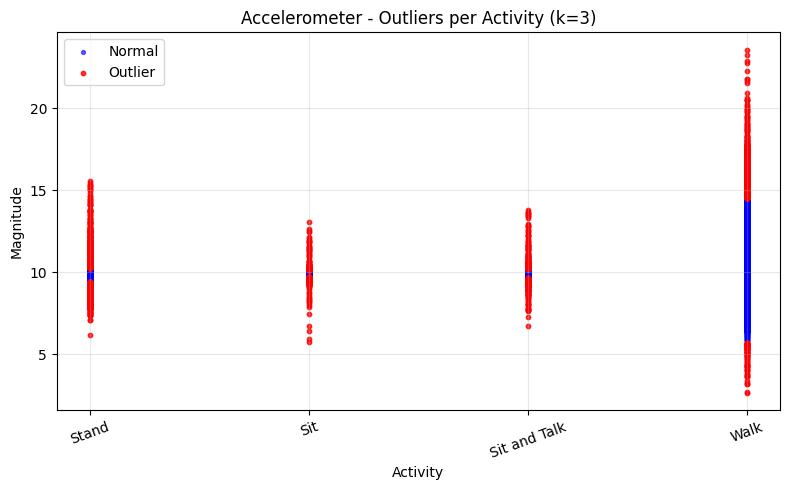


--- k = 3.5 ---
Stand: 1201 outliers
Sit: 182 outliers
Sit and Talk: 438 outliers
Walk: 700 outliers


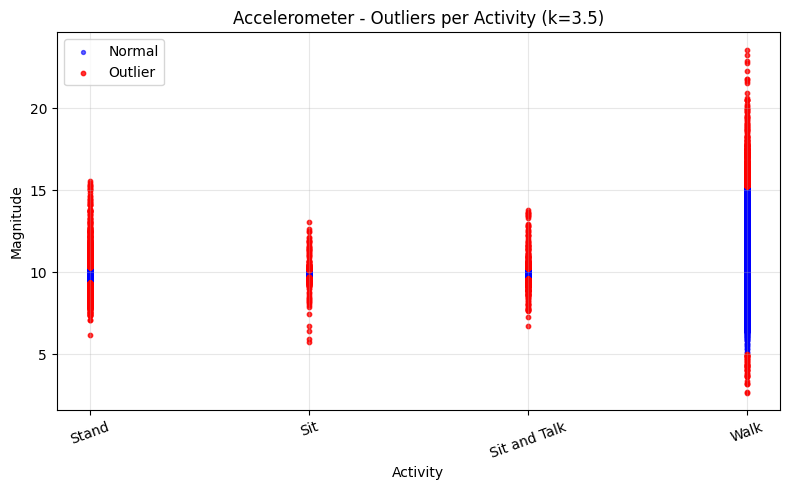


--- k = 4 ---
Stand: 1047 outliers
Sit: 150 outliers
Sit and Talk: 367 outliers
Walk: 368 outliers


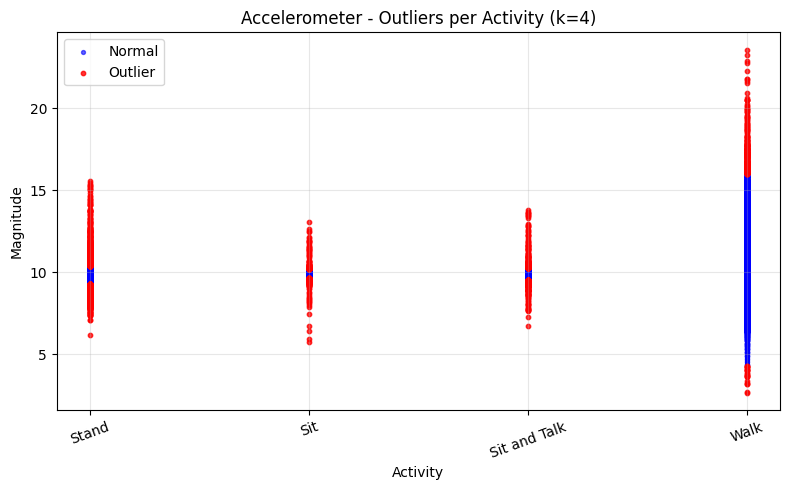

In [96]:
k_values = [3, 3.5, 4]
activity_names = ['Stand', 'Sit', 'Sit and Talk', 'Walk']

for k in k_values:
    outlier_counts = []
    for i, valores in enumerate(accelerometer_activity_sorted):
        z = np.array(z_acc[i])
        count = np.sum(np.abs(z) > k)
        outlier_counts.append(count)

    print(f"\n--- k = {k} ---")
    for name, count in zip(activity_names, outlier_counts):
        print(f"{name}: {count} outliers")

    plt.figure(figsize=(8, 5))
    plt.title(f"Accelerometer - Outliers per Activity (k={k})")
    plt.xlabel("Activity")
    plt.ylabel("Magnitude")
    
    for i, valores in enumerate(accelerometer_activity_sorted):
        z = np.array(z_acc[i])
        vals = np.array(valores)
        outlier_mask = np.abs(z) > k
        x_pos = np.ones_like(vals) * i

        plt.scatter(x_pos[~outlier_mask], vals[~outlier_mask],
                    color='blue', s=8, alpha=0.6, label='Normal' if i == 0 else "")
        plt.scatter(x_pos[outlier_mask], vals[outlier_mask],
                    color='red', s=10, alpha=0.8, label='Outlier' if i == 0 else "")

    plt.xticks(range(len(accelerometer_activity_sorted)), activity_names, rotation=20)
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()


- Plot function (Gyroscope)


--- k = 3 ---
Stand: 1963 outliers
Sit: 341 outliers
Sit and Talk: 434 outliers
Walk: 1329 outliers


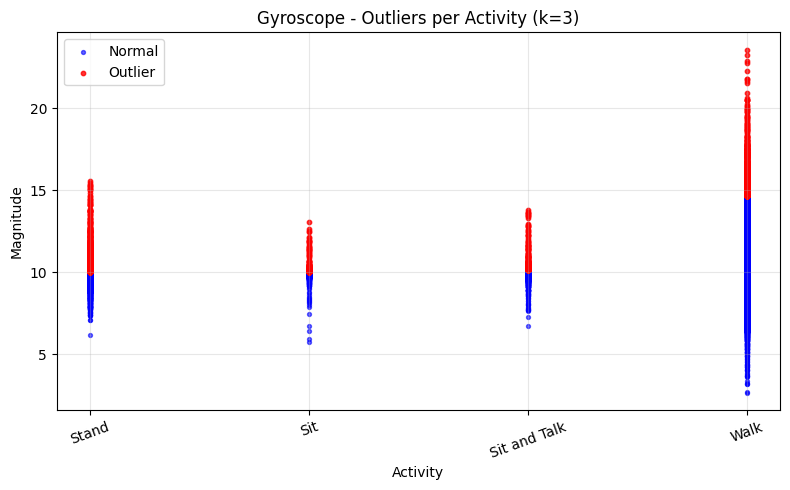


--- k = 3.5 ---
Stand: 1681 outliers
Sit: 304 outliers
Sit and Talk: 370 outliers
Walk: 712 outliers


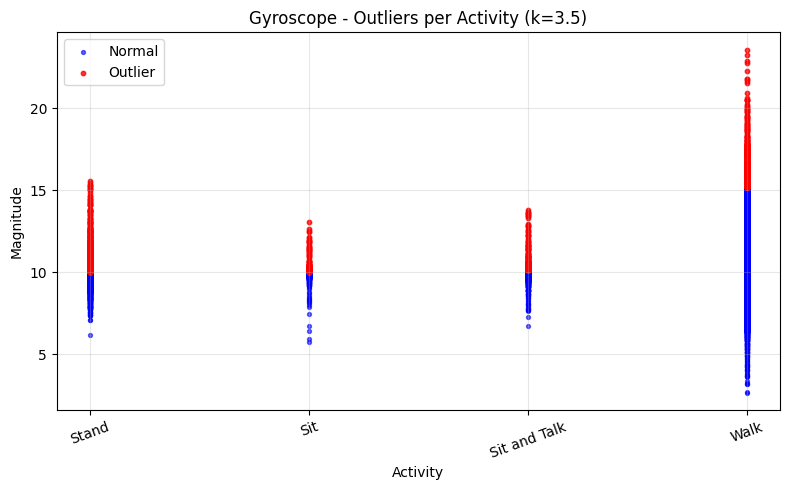


--- k = 4 ---
Stand: 1461 outliers
Sit: 276 outliers
Sit and Talk: 329 outliers
Walk: 437 outliers


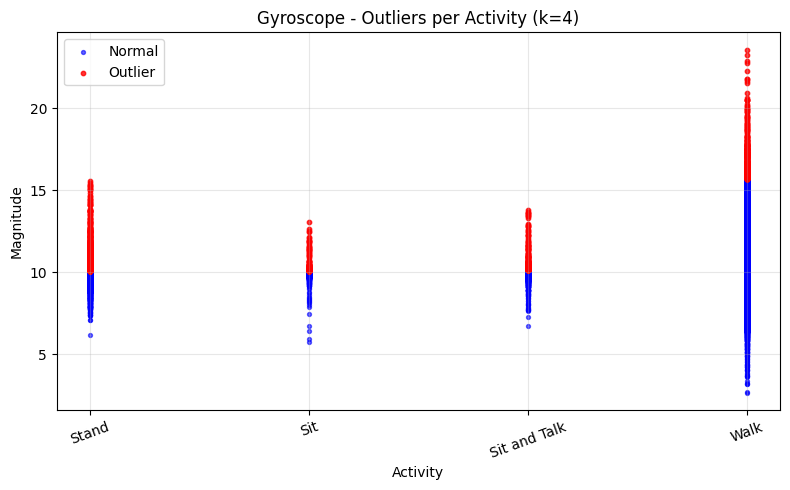

In [97]:
k_values = [3, 3.5, 4]
activity_names = ['Stand', 'Sit', 'Sit and Talk', 'Walk']

for k in k_values:
    outlier_counts = []
    for i, valores in enumerate(accelerometer_activity_sorted):
        z = np.array(z_gyr[i])
        count = np.sum(np.abs(z) > k)
        outlier_counts.append(count)

    print(f"\n--- k = {k} ---")
    for name, count in zip(activity_names, outlier_counts):
        print(f"{name}: {count} outliers")

    plt.figure(figsize=(8, 5))
    plt.title(f"Gyroscope - Outliers per Activity (k={k})")
    plt.xlabel("Activity")
    plt.ylabel("Magnitude")
    
    for i, valores in enumerate(accelerometer_activity_sorted):
        z = np.array(z_gyr[i])
        vals = np.array(valores)
        outlier_mask = np.abs(z) > k
        x_pos = np.ones_like(vals) * i

        plt.scatter(x_pos[~outlier_mask], vals[~outlier_mask],
                    color='blue', s=8, alpha=0.6, label='Normal' if i == 0 else "")
        plt.scatter(x_pos[outlier_mask], vals[outlier_mask],
                    color='red', s=10, alpha=0.8, label='Outlier' if i == 0 else "")

    plt.xticks(range(len(accelerometer_activity_sorted)), activity_names, rotation=20)
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()


- Plot function (Magnetometer)


--- k = 3 ---
Stand: 8 outliers
Sit: 2 outliers
Sit and Talk: 10 outliers
Walk: 961 outliers


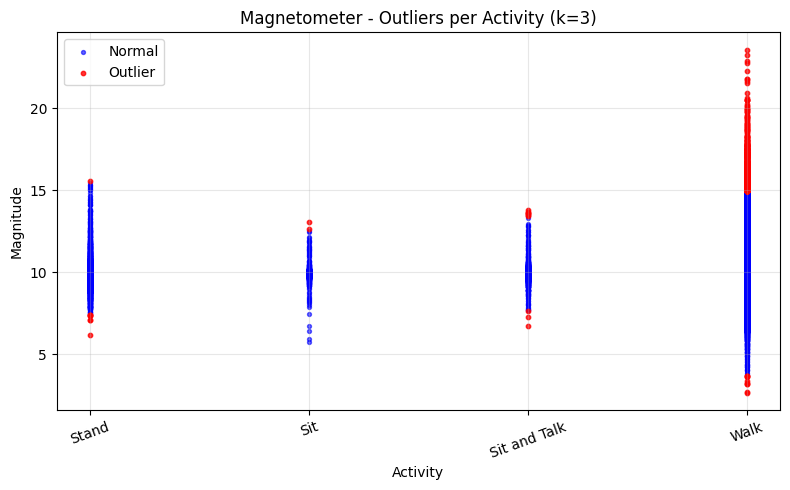


--- k = 3.5 ---
Stand: 6 outliers
Sit: 2 outliers
Sit and Talk: 10 outliers
Walk: 485 outliers


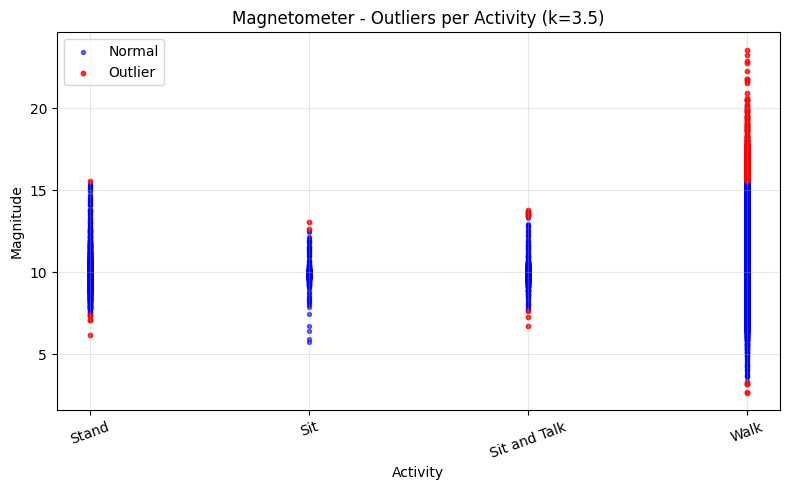


--- k = 4 ---
Stand: 1 outliers
Sit: 0 outliers
Sit and Talk: 9 outliers
Walk: 249 outliers


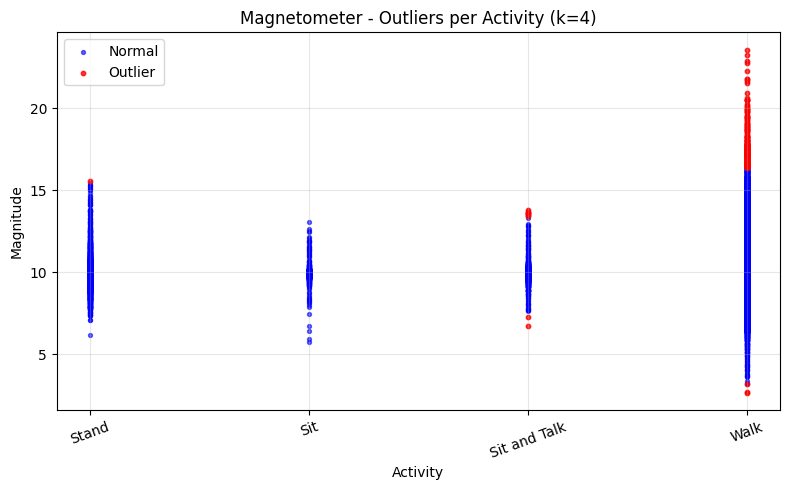

In [98]:
k_values = [3, 3.5, 4]
activity_names = ['Stand', 'Sit', 'Sit and Talk', 'Walk']

for k in k_values:
    outlier_counts = []
    for i, valores in enumerate(accelerometer_activity_sorted):
        z = np.array(z_mag[i])
        count = np.sum(np.abs(z) > k)
        outlier_counts.append(count)

    print(f"\n--- k = {k} ---")
    for name, count in zip(activity_names, outlier_counts):
        print(f"{name}: {count} outliers")

    plt.figure(figsize=(8, 5))
    plt.title(f"Magnetometer - Outliers per Activity (k={k})")
    plt.xlabel("Activity")
    plt.ylabel("Magnitude")
    
    for i, valores in enumerate(accelerometer_activity_sorted):
        z = np.array(z_mag[i])
        vals = np.array(valores)
        outlier_mask = np.abs(z) > k
        x_pos = np.ones_like(vals) * i

        plt.scatter(x_pos[~outlier_mask], vals[~outlier_mask],
                    color='blue', s=8, alpha=0.6, label='Normal' if i == 0 else "")
        plt.scatter(x_pos[outlier_mask], vals[outlier_mask],
                    color='red', s=10, alpha=0.8, label='Outlier' if i == 0 else "")

    plt.xticks(range(len(accelerometer_activity_sorted)), activity_names, rotation=20)
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()


### 3.5 - Compare the results obtained on 3.1 and 3.4 and the outliers density (IQR vs Z-Score)

In [99]:
for i, valores in enumerate(accelerometer_activity_sorted):
    out_z = [idx for idx, z in enumerate(z_acc[i]) if abs(z) > 3]
    out_iqr = [idx for idx, v in enumerate(valores)
               if v < lower_acc[i] or v > upper_acc[i]]

    intersec = len(set(out_z) & set(out_iqr))
    only_z = len(set(out_z) - set(out_iqr))
    only_iqr = len(set(out_iqr) - set(out_z))

    print(f"Atividade {i+1}:")
    print(f"  Outliers comuns: {intersec}")
    print(f"  Só Z-Score: {only_z}")
    print(f"  Só Boxplot: {only_iqr}")


Atividade 1:
  Outliers comuns: 1401
  Só Z-Score: 0
  Só Boxplot: 7646
Atividade 2:
  Outliers comuns: 236
  Só Z-Score: 0
  Só Boxplot: 296
Atividade 3:
  Outliers comuns: 523
  Só Z-Score: 0
  Só Boxplot: 2762
Atividade 4:
  Outliers comuns: 1530
  Só Z-Score: 0
  Só Boxplot: 3026


### 3.6 - K-Means Implementation

- combined_data with the modules of acc,gyr and mag

In [100]:
combined_data = []

for person_data in individuals:
    acc_mag = np.sqrt(person_data[:, 1]**2 + person_data[:, 2]**2 + person_data[:, 3]**2)
    gyro_mag = np.sqrt(person_data[:, 4]**2 + person_data[:, 5]**2 + person_data[:, 6]**2)
    mag_mag  = np.sqrt(person_data[:, 7]**2 + person_data[:, 8]**2 + person_data[:, 9]**2)
    activity_label = person_data[:, 11]
    combined = np.column_stack((acc_mag, gyro_mag, mag_mag, activity_label))
    combined_data.append(combined)

combined_data = np.vstack(combined_data)

In [101]:
combined_data

array([[9.91434009, 1.85251737, 1.22633992, 1.        ],
       [9.85318402, 1.79826785, 1.20399498, 1.        ],
       [9.77315129, 1.75491943, 1.22718534, 1.        ],
       ...,
       [9.84891563, 2.60580398, 0.91459902, 1.        ],
       [9.87151674, 3.09543186, 0.92667445, 1.        ],
       [9.90604344, 2.78560635, 0.90053616, 1.        ]],
      shape=(794257, 4))

- Each point has the following format (|a|,|g|,|m|)

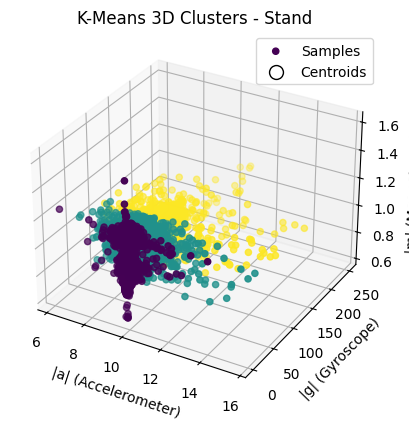

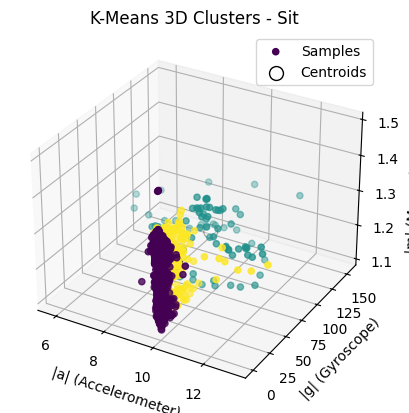

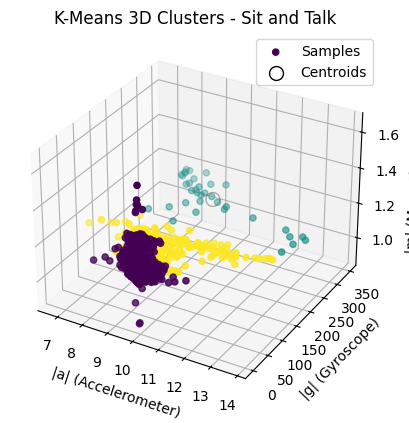

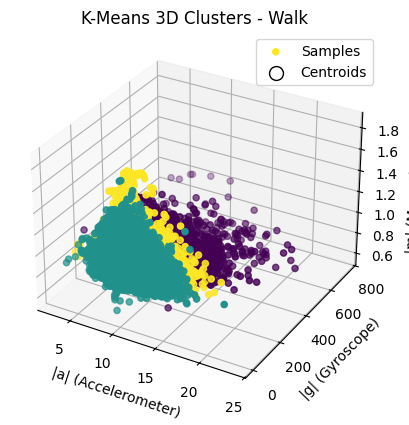

Stand           → 10739 outliers (6.62%)
Sit             → 2711 outliers (3.17%)
Sit and Talk    → 2653 outliers (3.17%)
Walk            → 45757 outliers (32.37%)


In [102]:
def k_means_3d(data, k=3, max_iters=100):
    X = np.array(data)
    n_samples, n_features = X.shape

    indices = np.random.choice(n_samples, k, replace=False)
    centroids = X[indices]

    for _ in range(max_iters):
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        new_centroids = np.array([
            X[labels == j].mean(axis=0) if np.any(labels == j) else centroids[j]
            for j in range(k)
        ])
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids

    final_distances = np.linalg.norm(X - centroids[labels], axis=1)
    return centroids, labels, final_distances



def detectar_outliers_kmeans_3d(a_values, g_values, m_values, k=3, threshold=2):
    data = np.column_stack((a_values, g_values, m_values))
    centroids, labels, distances = k_means_3d(data, k=k)

    stds = [np.std(distances[labels == j]) for j in range(k)]
    limits = [threshold * s for s in stds]

    outliers_idx = [i for i, (d, l) in enumerate(zip(distances, labels)) if d > limits[l]]
    return data, centroids, labels, outliers_idx


def contar_outliers_por_atividade(combined_matrix, activity_labels, activity_names, k=3, threshold=2):

    for label, name in zip(activity_labels, activity_names):
        activity_data = combined_matrix[combined_matrix[:, 3] == label]
        a_vals = activity_data[:, 0]
        g_vals = activity_data[:, 1]
        m_vals = activity_data[:, 2]

        _, _, _, outliers_idx = detectar_outliers_kmeans_3d(a_vals, g_vals, m_vals, k=k, threshold=threshold)

        print(f"{name:<15} → {len(outliers_idx)} outliers ({len(outliers_idx)/len(activity_data)*100:.2f}%)")



def plot_kmeans_clusters_3d(data, centroids, labels, activity_name="Activity"):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(data[:,0], data[:,1], data[:,2],
               c=labels, cmap='viridis', s=20, label='Samples')

    ax.scatter(centroids[:,0], centroids[:,1], centroids[:,2],
               c='white', edgecolors='black', s=100, label='Centroids')

    ax.set_xlabel('|a| (Accelerometer)')
    ax.set_ylabel('|g| (Gyroscope)')
    ax.set_zlabel('|m| (Magnetometer)')
    ax.set_title(f'K-Means 3D Clusters - {activity_name}')
    ax.legend()
    plt.show()



activity_names = ['Stand', 'Sit', 'Sit and Talk', 'Walk']
activity_labels = [1, 2, 3, 4]

for label, name in zip(activity_labels, activity_names):
    activity_data = combined_data[combined_data[:, 3] == label]
    a_vals = activity_data[:, 0]
    g_vals = activity_data[:, 1]
    m_vals = activity_data[:, 2]

    data, centroids, labels, outliers_idx = detectar_outliers_kmeans_3d(
        a_vals, g_vals, m_vals, k=3, threshold=2
    )

    plot_kmeans_clusters_3d(data, centroids, labels, activity_name=name)

contar_outliers_por_atividade(combined_data, activity_labels, activity_names, k=3, threshold=2)

In [103]:
print(data,"\n")
print(centroids,"\n")
print(labels,"\n")
print(outliers_idx,"\n")

[[ 9.93599505 87.7540551   1.0548599 ]
 [ 9.82292664 92.29748452  1.05410797]
 [ 9.65611414 97.28865756  1.05350155]
 ...
 [10.21752813 28.20139821  0.98498468]
 [10.16815157 28.7876341   0.96593739]
 [10.05269614 29.99084284  0.96626527]] 

[[ 10.81446763 173.0938747    1.01984269]
 [  9.97498239  38.9549167    1.03261483]
 [ 10.13363008  96.10744243   1.02748463]] 

[2 2 2 ... 1 1 1] 

[10, 11, 19, 28, 34, 50, 51, 55, 77, 83, 93, 94, 95, 96, 97, 98, 115, 116, 120, 121, 139, 145, 148, 165, 170, 172, 176, 179, 180, 183, 184, 187, 189, 190, 199, 200, 201, 210, 211, 212, 213, 214, 218, 228, 229, 230, 233, 234, 237, 246, 247, 248, 249, 253, 254, 257, 263, 264, 265, 266, 267, 268, 269, 277, 281, 282, 283, 288, 292, 293, 294, 299, 300, 306, 330, 336, 351, 353, 357, 368, 386, 387, 388, 394, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 416, 417, 418, 422, 428, 429, 430, 431, 440, 441, 442, 443, 444, 445, 457, 458, 462, 463, 464, 465, 472, 473, 474, 481, 482, 486, 487, 490, 507,

## TODO: Scattert Plot for the outliers identified by kmeans

## 4 - Feature Engineering

### 4.1 - Statistical Significance

- Data don´t follow a normal distribution

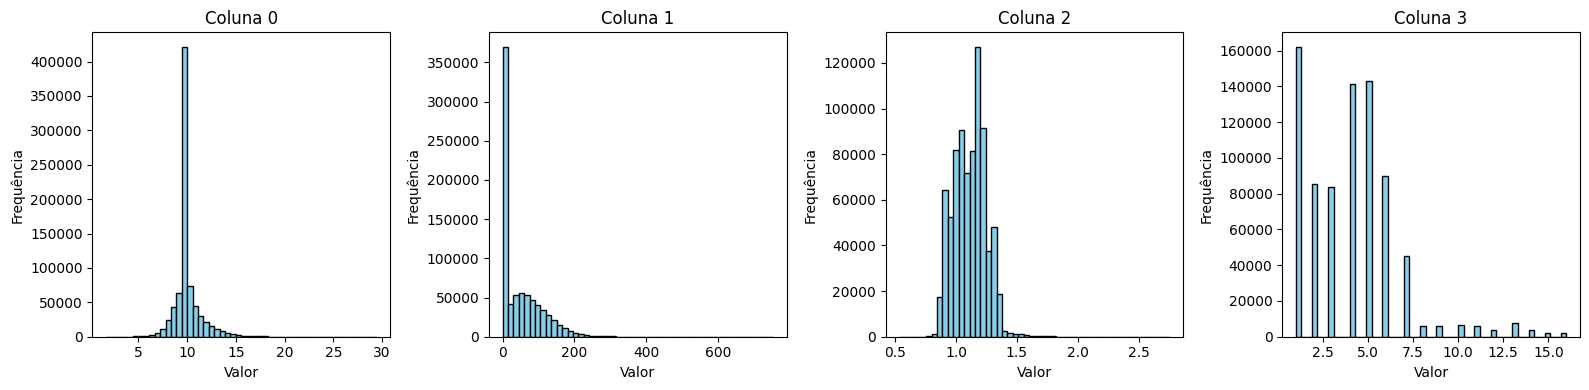

In [104]:
fig, axs = plt.subplots(1, 4, figsize=(16, 4))

for i in range(4):
    axs[i].hist(combined_data[:, i], bins=50, color='skyblue', edgecolor='black')
    axs[i].set_title(f'Coluna {i}')
    axs[i].set_xlabel('Valor')
    axs[i].set_ylabel('Frequência')

plt.tight_layout()
plt.show()

- Kolmogorov-Smirnov

In [105]:
activity_names = ['Stand', 'Sit', 'Sit and Talk', 'Walk']
activity_labels = [1, 2, 3, 4]

print("=== Kolmogorov–Smirnov test for normality ===\n")

for label, name in zip(activity_labels, activity_names):
    activity_data = combined_data[combined_data[:, 3] == label]

    acc = activity_data[:, 0]
    gyr = activity_data[:, 1]
    mag = activity_data[:, 2]

    acc = (acc - np.mean(acc)) / np.std(acc)
    gyr = (gyr - np.mean(gyr)) / np.std(gyr)
    mag = (mag - np.mean(mag)) / np.std(mag)

    ks_acc = kstest(acc, 'norm')
    ks_gyr = kstest(gyr, 'norm')
    ks_mag = kstest(mag, 'norm')

    print(f"Activity: {name}")
    print(f"  Accelerometer: statistic={ks_acc.statistic:.4f}, p-value={ks_acc.pvalue:.4e}")
    print(f"  Gyroscope:     statistic={ks_gyr.statistic:.4f}, p-value={ks_gyr.pvalue:.4e}")
    print(f"  Magnetometer:  statistic={ks_mag.statistic:.4f}, p-value={ks_mag.pvalue:.4e}\n")

=== Kolmogorov–Smirnov test for normality ===

Activity: Stand
  Accelerometer: statistic=0.2560, p-value=0.0000e+00
  Gyroscope:     statistic=0.3428, p-value=0.0000e+00
  Magnetometer:  statistic=0.1684, p-value=0.0000e+00

Activity: Sit
  Accelerometer: statistic=0.1082, p-value=0.0000e+00
  Gyroscope:     statistic=0.3599, p-value=0.0000e+00
  Magnetometer:  statistic=0.1216, p-value=0.0000e+00

Activity: Sit and Talk
  Accelerometer: statistic=0.1590, p-value=0.0000e+00
  Gyroscope:     statistic=0.3991, p-value=0.0000e+00
  Magnetometer:  statistic=0.1006, p-value=0.0000e+00

Activity: Walk
  Accelerometer: statistic=0.0734, p-value=0.0000e+00
  Gyroscope:     statistic=0.0684, p-value=0.0000e+00
  Magnetometer:  statistic=0.0409, p-value=1.3775e-205



- Shapiro-Wilk

In [106]:
activity_names = ['Stand', 'Sit', 'Sit and Talk', 'Walk']
activity_labels = [1, 2, 3, 4]

print("=== Shapiro–Wilk test for normality ===\n")

for label, name in zip(activity_labels, activity_names):
    activity_data = combined_data[combined_data[:, 3] == label]

    acc = activity_data[:, 0]
    gyr = activity_data[:, 1]
    mag = activity_data[:, 2]

    sh_acc = shapiro(acc)
    sh_gyr = shapiro(gyr)
    sh_mag = shapiro(mag)

    print(f"Activity: {name}")
    print(f"  Accelerometer: statistic={sh_acc.statistic:.4f}, p-value={sh_acc.pvalue:.4e}")
    print(f"  Gyroscope:     statistic={sh_gyr.statistic:.4f}, p-value={sh_gyr.pvalue:.4e}")
    print(f"  Magnetometer:  statistic={sh_mag.statistic:.4f}, p-value={sh_mag.pvalue:.4e}\n")


=== Shapiro–Wilk test for normality ===

Activity: Stand
  Accelerometer: statistic=0.3083, p-value=7.8119e-185
  Gyroscope:     statistic=0.2338, p-value=1.7380e-188
  Magnetometer:  statistic=0.9015, p-value=3.3994e-122

Activity: Sit
  Accelerometer: statistic=0.5549, p-value=6.6404e-153
  Gyroscope:     statistic=0.0950, p-value=1.8012e-176
  Magnetometer:  statistic=0.9200, p-value=5.6056e-103

Activity: Sit and Talk
  Accelerometer: statistic=0.4649, p-value=3.4345e-158
  Gyroscope:     statistic=0.0917, p-value=6.8616e-176
  Magnetometer:  statistic=0.9410, p-value=1.2289e-94

Activity: Walk
  Accelerometer: statistic=0.9545, p-value=2.0153e-98
  Gyroscope:     statistic=0.9284, p-value=2.0173e-110
  Magnetometer:  statistic=0.9751, p-value=1.5055e-83



/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 162125.
  res = hypotest_fun_out(*samples, **kwds)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 85632.
  res = hypotest_fun_out(*samples, **kwds)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 83584.
  res = hypotest_fun_out(*samples, **kwds)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate

- Kruskal-Wallis H-test 

In [107]:
activity_labels = [1, 2, 3, 4]
activity_names = ['Stand', 'Sit', 'Sit and Talk', 'Walk']

print("=== Kruskal–Wallis Test for Mean Differences Across Activities ===\n")

for i, sensor_name in enumerate(['|a| (Accelerometer)', '|g| (Gyroscope)', '|m| (Magnetometer)']):
    groups = [combined_data[combined_data[:,3] == label][:, i] for label in activity_labels]

    stat, p = kruskal(*groups)
    print(f"{sensor_name}: statistic={stat:.4f}, p-value={p:.4e}")

    if p < 0.05:
        print("  → Diferença estatisticamente significativa entre as médias das atividades.")
    else:
        print("  → Não há diferença significativa.\n")
    print()


=== Kruskal–Wallis Test for Mean Differences Across Activities ===

|a| (Accelerometer): statistic=77827.9787, p-value=0.0000e+00
  → Diferença estatisticamente significativa entre as médias das atividades.

|g| (Gyroscope): statistic=307611.2942, p-value=0.0000e+00
  → Diferença estatisticamente significativa entre as médias das atividades.

|m| (Magnetometer): statistic=210212.5372, p-value=0.0000e+00
  → Diferença estatisticamente significativa entre as médias das atividades.



## 4.2 - Extract Temporal and Spectral Features

- combined_data with (x,y,z)

In [108]:
import numpy as np

combined_data = []
activities_to_keep = [1, 2, 3, 4]

for i, person_data in enumerate(individuals):
    
    mask = np.isin(person_data[:, 11], activities_to_keep)
    filtered_person_data = person_data[mask]

    if filtered_person_data.shape[0] > 0:
        ax, ay, az = filtered_person_data[:, 1], filtered_person_data[:, 2], filtered_person_data[:, 3]
        gx, gy, gz = filtered_person_data[:, 4], filtered_person_data[:, 5], filtered_person_data[:, 6]
        mx, my, mz = filtered_person_data[:, 7], filtered_person_data[:, 8], filtered_person_data[:, 9]
        activity_label = filtered_person_data[:, 11]

        participant_column = np.full(filtered_person_data.shape[0], i)

        combined = np.column_stack((participant_column, ax, ay, az, gx, gy, gz, mx, my, mz, activity_label))
        combined_data.append(combined)

if combined_data:
    combined_data = np.vstack(combined_data)
    print("combined_data shape:", combined_data.shape)
    print("Example:", combined_data[0])
else:
    print("No data found for activities 1-4.")


combined_data shape: (472683, 11)
Example: [ 0.      -1.865    9.389    2.5812  -1.1418  -1.1856   0.84998 -0.34476
  0.59839  1.0134   1.     ]


- 139 features per window (using x,y,z)

In [109]:
def zero_cross_rate(x):
    return np.sum(np.diff(np.sign(x)) != 0) / len(x)

def mean_cross_rate(x):
    mean_val = np.mean(x)
    return np.sum(np.diff(np.sign(x - mean_val)) != 0) / len(x)

def spectral_entropy(x, fs):
    X = np.abs(rfft(x))
    psd = X**2
    psd /= np.sum(psd)
    return -np.sum(psd * np.log2(psd + 1e-12))

def dominant_frequency(x, fs):
    X = np.abs(rfft(x))
    freqs = rfftfreq(len(x), 1/fs)
    return freqs[np.argmax(X[1:])]  # para não aparecer o primeiro elemento (DC)

def energy(x):
    X = np.abs(rfft(x))
    return np.sum(X**2) / len(x)

def extract_statistical_features(signal, fs):
    x = signal
    feats = [
        np.mean(x),
        np.median(x),
        np.std(x),
        np.var(x),
        np.sqrt(np.mean(x**2)),          
        np.mean(np.diff(x)),             
        stats.skew(x),
        stats.kurtosis(x),
        np.percentile(x, 75) - np.percentile(x, 25),  
        zero_cross_rate(x),
        mean_cross_rate(x),
        spectral_entropy(x, fs),
        dominant_frequency(x, fs),
        energy(x)
    ]
    return np.array(feats)


def extract_physical_features(acc, gyro, fs):
 
    MI = np.linalg.norm(acc, axis=1)
    AI = np.mean(MI)
    VI = np.var(MI)
    SMA = np.mean(np.sum(np.abs(acc), axis=1))

    cov = np.cov(acc.T)
    eigvals = np.sort(np.linalg.eigvals(cov))[::-1][:2]

    gravity = acc[:, 0]
    heading = np.linalg.norm(acc[:, 1:3], axis=1)
    CAGH = np.corrcoef(gravity, heading)[0, 1]

    dt = 1/fs
    vel_y = np.cumsum(acc[:, 1]) * dt
    vel_z = np.cumsum(acc[:, 2]) * dt
    AVH = np.mean(np.sqrt(vel_y**2 + vel_z**2))
    vel_x = np.cumsum(acc[:, 0]) * dt
    AVG = np.mean(vel_x)

    rot_angle = np.cumsum(gyro[:, 0]) * dt
    ARATG = np.mean(rot_angle)

    DF_acc = dominant_frequency(MI, fs)
    ENERGY_acc = energy(MI)
    AAE = np.mean([energy(acc[:, i]) for i in range(3)])
    ARE = np.mean([energy(gyro[:, i]) for i in range(3)])

    return np.array([AI, VI, SMA, *eigvals, CAGH, AVH, AVG, ARATG,
                     DF_acc, ENERGY_acc, AAE, ARE])


def extract_features_from_window_9d(window, fs):

    features_all = []

    for i in range(9):
        signal = window[:, i]
        feats = extract_statistical_features(signal, fs)
        features_all.extend(feats)

    acc = window[:, 0:3]
    gyro = window[:, 3:6]
    phys = extract_physical_features(acc, gyro, fs)
    features_all.extend(phys)

    return np.array(features_all)


def segment_data_combined(combined_matrix, fs=50, win_time=5, overlap=0.5):

    participants = combined_matrix[:, 0]  # Column 0: participant ID
    data = combined_matrix[:, 1:10]        # Columns 1-9: sensor features
    labels = combined_matrix[:, 10]        # Column 10: activity label

    win_len = int(win_time * fs)
    step = int(win_len * (1 - overlap))
    segments = []

    for start in range(0, len(data) - win_len + 1, step):
        end = start + win_len
        seg_labels = labels[start:end]
        seg_participants = participants[start:end]
        
        if (np.all(seg_labels == seg_labels[0]) and 
            np.all(seg_participants == seg_participants[0])):
            segments.append((data[start:end, :], seg_labels[0], seg_participants[0]))

    return segments




# each row will have 250 samples
fs = 50  
segments = segment_data_combined(combined_data, fs=fs, win_time=5, overlap=0.5)

print(f"Number of valid windows: {len(segments)}")

feature_vectors = []
labels = []
participants = []

for seg_data, seg_label, seg_participant in segments:
    feat = extract_features_from_window_9d(seg_data, fs)
    feature_vectors.append(feat)
    labels.append(seg_label)
    participants.append(seg_participant)

X = np.vstack(feature_vectors)
y = np.array(labels)
participants = np.array(participants)

print("Final Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("Shape of participants:", participants.shape)

Number of valid windows: 3512
Final Shape of X: (3512, 139)
Shape of y: (3512,)
Shape of participants: (3512,)


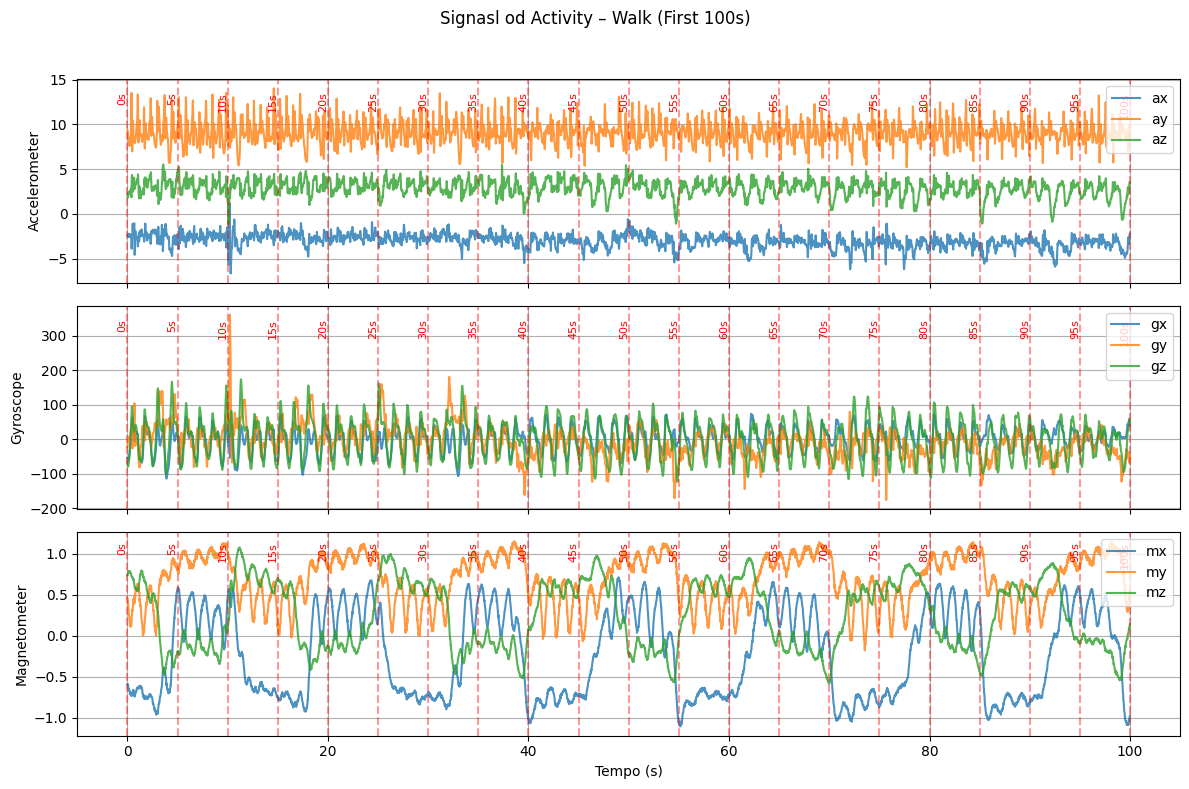

In [110]:
activity_label = 4     
activity_name = 'Walk'
fs = 50                
duration_s = 100       
window_s = 5        


mask = combined_data[:,10] == activity_label  
data = combined_data[mask]

n_samples = int(duration_s * fs)
n_samples = min(n_samples, len(data))

ax, ay, az = data[:n_samples,1], data[:n_samples,2], data[:n_samples,3]
gx, gy, gz = data[:n_samples,4], data[:n_samples,5], data[:n_samples,6]
mx, my, mz = data[:n_samples,7], data[:n_samples,8], data[:n_samples,9]

time = np.arange(n_samples) / fs

fig, axs = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

# Acelerómetro
axs[0].plot(time, ax, label='ax', alpha=0.8)
axs[0].plot(time, ay, label='ay', alpha=0.8)
axs[0].plot(time, az, label='az', alpha=0.8)
axs[0].set_ylabel("Accelerometer")
axs[0].legend(loc='upper right')
axs[0].grid(True)

# Giroscópio
axs[1].plot(time, gx, label='gx', alpha=0.8)
axs[1].plot(time, gy, label='gy', alpha=0.8)
axs[1].plot(time, gz, label='gz', alpha=0.8)
axs[1].set_ylabel("Gyroscope")
axs[1].legend(loc='upper right')
axs[1].grid(True)

# Magnetómetro
axs[2].plot(time, mx, label='mx', alpha=0.8)
axs[2].plot(time, my, label='my', alpha=0.8)
axs[2].plot(time, mz, label='mz', alpha=0.8)
axs[2].set_ylabel("Magnetometer")
axs[2].set_xlabel("Tempo (s)")
axs[2].legend(loc='upper right')
axs[2].grid(True)

# Linhas verticais a cada janela
for t in np.arange(0, duration_s + window_s, window_s):
    for ax in axs:
        ax.axvline(x=t, color='red', linestyle='--', alpha=0.4)
        ax.text(t, ax.get_ylim()[1]*0.9, f"{int(t)}s", color='red',
                rotation=90, va='top', ha='right', fontsize=8)

fig.suptitle(f"Signasl od Activity – {activity_name} (First {duration_s}s)")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


## 4.3 - PCA

## TODO: Graphical representation of PC1 and PC2

In [111]:
X_zscore = zscore(X,axis=0)

X_zscore = np.nan_to_num(X_zscore)

print("Shape de X_zscore:", X_zscore.shape)
print("Mean (≈0):", np.mean(X_zscore, axis=0)[:5])
print("Standard Deviation (≈1):", np.std(X_zscore, axis=0)[:5])

Shape de X_zscore: (3512, 139)
Mean (≈0): [-1.84109877e-16 -6.25473319e-15 -6.57693338e-16  4.26718266e-16
  7.79392686e-16]
Standard Deviation (≈1): [1. 1. 1. 1. 1.]


In [112]:
def pca(data,n_components):
    mean = np.mean(data,axis=0)
    centered_data = data-mean

    covariance_matrix = np.cov(centered_data,rowvar=False)

    eigenvalues,eigenvectors = np.linalg.eigh(covariance_matrix)

    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:,sorted_indices]

    principal_components = eigenvectors[:,:n_components]

    transformed_data = np.dot(centered_data,principal_components)

    return transformed_data,principal_components,eigenvalues

In [113]:
n_components = 3

X_pca,principal_components, eigenvalues = pca(X_zscore,n_components)

print("Original Shape of X:", X.shape)
print("Shape after PCA of X:", X_pca.shape)
print("\nEigenvalues: ",eigenvalues)

Original Shape of X: (3512, 139)
Shape after PCA of X: (3512, 3)

Eigenvalues:  [ 4.94585636e+01  1.33689746e+01  7.08615907e+00  5.34709271e+00
  3.72064974e+00  3.55137481e+00  3.21378249e+00  2.77182676e+00
  2.26654879e+00  2.07606174e+00  2.03946701e+00  1.83272450e+00
  1.76538659e+00  1.65513272e+00  1.55025367e+00  1.50942771e+00
  1.36026114e+00  1.29313636e+00  1.24129870e+00  1.21286864e+00
  1.21010876e+00  1.18888293e+00  1.10102523e+00  1.08522055e+00
  1.06426203e+00  1.03955487e+00  1.02889082e+00  9.46883771e-01
  9.24020494e-01  9.07581214e-01  8.94221288e-01  8.49293498e-01
  8.20518325e-01  7.87924862e-01  7.20052702e-01  6.91078881e-01
  6.67231458e-01  6.47720758e-01  6.37434633e-01  6.21899270e-01
  5.98244235e-01  5.95721925e-01  5.69316614e-01  5.44548680e-01
  5.19726275e-01  4.76217381e-01  4.61597276e-01  4.35649335e-01
  4.26329676e-01  4.13965662e-01  3.95732182e-01  3.94304464e-01
  3.79406479e-01  3.60246931e-01  3.39280535e-01  3.36463170e-01
  3.271912

## 4.4 - Importance of each principal component

- Graphical visualization of the principal components

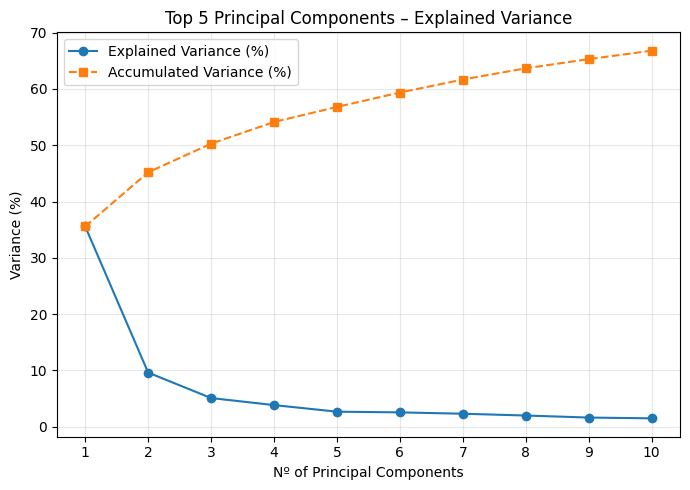

In [114]:
eigenvalues = np.array(eigenvalues)

sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues_sorted = eigenvalues[sorted_indices]

explained_variance_ratio = eigenvalues_sorted / np.sum(eigenvalues_sorted) * 100

top_n = 10
top_eigenvalues = eigenvalues_sorted[:top_n]
top_variance = explained_variance_ratio[:top_n]

cumulative_top = np.cumsum(top_variance)

plt.figure(figsize=(7, 5))
plt.plot(range(1, top_n + 1), top_variance, marker='o', label='Explained Variance (%)')
plt.plot(range(1, top_n + 1), cumulative_top, marker='s', linestyle='--', label='Accumulated Variance (%)')

plt.title("Top 5 Principal Components – Explained Variance")
plt.xlabel("Nº of Principal Components")
plt.ylabel("Variance (%)")
plt.xticks(range(1, top_n + 1))
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


In [115]:
print("=== Top 5 Principal Components ===")
for i, (eig, var) in enumerate(zip(top_eigenvalues, top_variance), start=1):
    print(f"PC{i}: eigenvalue = {eig:.4f} | explained variance = {var:.2f}%")

print(f"\nAccumulated Variance (Top 5): {np.sum(top_variance):.2f}%")

=== Top 5 Principal Components ===
PC1: eigenvalue = 49.4586 | explained variance = 35.57%
PC2: eigenvalue = 13.3690 | explained variance = 9.62%
PC3: eigenvalue = 7.0862 | explained variance = 5.10%
PC4: eigenvalue = 5.3471 | explained variance = 3.85%
PC5: eigenvalue = 3.7206 | explained variance = 2.68%
PC6: eigenvalue = 3.5514 | explained variance = 2.55%
PC7: eigenvalue = 3.2138 | explained variance = 2.31%
PC8: eigenvalue = 2.7718 | explained variance = 1.99%
PC9: eigenvalue = 2.2665 | explained variance = 1.63%
PC10: eigenvalue = 2.0761 | explained variance = 1.49%

Accumulated Variance (Top 5): 66.79%


- Features that are needed to explain 75% of the data

In [116]:
cumulative_variance = np.cumsum(explained_variance_ratio)


dimensions_needed = np.argmax(cumulative_variance >= 75) + 1 

print(f"\n--- Dimensions for 75% Variance ---")
print(f"To explain 75% of the variance, you would need {dimensions_needed} dimensions.")
print(f"The first {dimensions_needed} components explain {cumulative_variance[dimensions_needed-1]:.2f}% of the variance.")


--- Dimensions for 75% Variance ---
To explain 75% of the variance, you would need 17 dimensions.
The first 17 components explain 75.21% of the variance.


In [117]:
# Statistical Features
axes = ['ax', 'ay', 'az', 'gx', 'gy', 'gz', 'mx', 'my', 'mz']
stat_feats = ['mean', 'median', 'std', 'var', 'rms', 'mean_diff',
              'skew', 'kurtosis', 'iqr', 'zcr', 'mcr',
              'spec_entropy', 'dom_freq', 'energy']

feature_names = [f"{axis}_{feat}" for axis in axes for feat in stat_feats]

# Physical Features
phys_feats = ['AI', 'VI', 'SMA', 'eig1', 'eig2', 'CAGH',
              'AVH', 'AVG', 'ARATG', 'DF_acc', 'ENERGY_acc', 'AAE', 'ARE']
feature_names.extend(phys_feats)

print(f"Total de features: {len(feature_names)}")
print("Example:", feature_names[:10])


Total de features: 139
Example: ['ax_mean', 'ax_median', 'ax_std', 'ax_var', 'ax_rms', 'ax_mean_diff', 'ax_skew', 'ax_kurtosis', 'ax_iqr', 'ax_zcr']


In [118]:
for i in range(principal_components.shape[1]):
    print(f"\n=== Principal Component {i+1} ===")
    
    loadings = principal_components[:, i]
    
    sorted_idx = np.argsort(np.abs(loadings))[::-1][:10]
    
    for idx in sorted_idx:
        print(f"{feature_names[idx]:<25} loading = {loadings[idx]:.4f}")


=== Principal Component 1 ===
gy_rms                    loading = 0.1325
gy_std                    loading = 0.1315
gz_rms                    loading = 0.1309
gz_std                    loading = 0.1308
az_std                    loading = 0.1302
gy_iqr                    loading = 0.1291
ax_std                    loading = 0.1288
my_mcr                    loading = -0.1288
az_iqr                    loading = 0.1281
mz_mcr                    loading = -0.1279

=== Principal Component 2 ===
az_rms                    loading = -0.1833
az_median                 loading = -0.1754
az_mean                   loading = -0.1752
my_mean                   loading = 0.1748
ay_median                 loading = 0.1740
ay_mean                   loading = 0.1721
my_median                 loading = 0.1711
ay_energy                 loading = 0.1692
az_energy                 loading = -0.1684
ay_rms                    loading = 0.1653

=== Principal Component 3 ===
mx_rms                    loading = -0.28

### 4.4.1 - Instant of my choice

- Perform manually the center of the data and the transformation that happened on the PCA

- They match so the mathematical steps are correct.

In [119]:
instant_index = 0
single_instant_scaled = X_zscore[instant_index]

data_mean = np.mean(X_zscore, axis=0)

single_instant_centered = single_instant_scaled - data_mean


compressed_features_manual = np.dot(single_instant_centered, principal_components)


print(f"--- Example for Instant (row {instant_index}) ---")
print(f"\nOriginal Scaled Features (first 5 of 139):")
print(single_instant_scaled[:5])

print(f"\n--- After Compression ---")
print(f"New 'compressed' features (manual calc): {compressed_features_manual}")

print(f"Value from your pre-computed X_pca array: {X_pca[instant_index]}")
print(f"\nSuccess! The results match.")

--- Example for Instant (row 0) ---

Original Scaled Features (first 5 of 139):
[ 0.67100438  0.66569702 -0.53777858 -0.42832668 -0.75486569]

--- After Compression ---
New 'compressed' features (manual calc): [-1.13208541  4.06711953  0.02501034]
Value from your pre-computed X_pca array: [-1.13208541  4.06711953  0.02501034]

Success! The results match.


### 4.4.2

Advantages: 
- Combats the "Curse of Dimensionality": You started with 139 features. This is a very high-dimensional space. Many machine learning models, especially k-NN (which your project requires), become slow and perform poorly in high dimensions. Reducing it to 20 or 30 dimensions makes the problem much easier for the classifier.

- Faster Model Training: By feeding your k-NN classifier only 20 features instead of 139, the distance calculations will be significantly faster, speeding up both training and prediction.

- Removes Multicollinearity: Your original features were likely highly correlated (e.g., ax_mean and ax_median). By definition, your new principal components are mathematically uncorrelated (orthogonal). This is better for many models (like linear regression) and cleans up the data.

- Noise Reduction: The principal components with very small eigenvalues (the ones you discard) often represent noise in the data. By throwing them away, you are keeping the main "signal" and filtering out the noise, which can lead to a more robust model.

- Allows for Visualization: This is a key advantage, especially in your code where you set n_components = 3. It is impossible to plot and visually understand 139 dimensions. By reducing it to 3 (as in X_pca), you can create a 3D scatter plot and visually inspect your data to see if the activities (Stand, Sit, Walk) form distinct clusters.

Disadvantages: 
- Loss of Interpretability: This is the biggest limitation. Your original 139 features had clear physical meanings (e.g., ax_mean is the average acceleration on the x-axis). Your new features, PC1, PC2, and PC3, do not. As we saw, PC1 is a complex linear combination of all 139 original features. It's just a mathematical abstract, and you can no longer say "this person is walking because their ax_mean is high."

- Information Loss: It is a "lossy" compression. When you decided to keep components that explain 75% of the variance, you are also making an explicit decision to throw away 25% of the information (variance). While we hope this is just noise, it's possible you discarded subtle information that was actually useful for separating two similar activities.

- Assumes Linearity: PCA is a linear algorithm. It tries to find the best linear (straight line) axes to project the data onto. If your data has a complex, non-linear structure (like a "Swiss Roll" or spiral shape), PCA will not be able to "unroll" it properly.

- Sensitive to Scaling: You did this correctly by using zscore! This is a limitation you successfully handled. If you had fed the raw, unscaled data into PCA, any feature with a very large range (e.g., 0-1000) would have dominated the covariance matrix, and PCA would have just "discovered" that feature, which is useless.

- Maximizes Variance, Not Class Separability: This is a subtle but important point. PCA is unsupervised; it looks at the X data only and doesn't care about your activity labels (y). It finds the axes of maximum variance. It is possible that the axis that best separates "Sit" from "Stand" is not one of the top axes of variance. A (supervised) alternative called Linear Discriminant Analysis (LDA) tries to find the axes that maximize the separation between classes.

## 4.5 - Fisher Score and RelieF

- Fisher Score

FS = Variance between classes/Variance on classes

In [120]:
def fisher_score(X, y):

    n_samples, n_features = X.shape
    scores = []
    
    classes = np.unique(y)
    K = len(classes)

    # for each feature 
    for j in range(n_features):
        feature_col = X[:, j]
        overall_mean = np.mean(feature_col) # calculate the mean of the feature (all data)
        
        # for each activity/class (1,2,3,4)
        ss_between = 0
        for k in classes:
            X_k = feature_col[y == k]
            n_k = len(X_k)
            mean_k = np.mean(X_k)   # mean of the activity/class
            ss_between += n_k * ((mean_k - overall_mean) ** 2)  # the formula that the teacher used on the class, to see if the mean 
        
        # Degrees of freedom between groups
        df_between = K - 1
        var_between = ss_between / df_between   # transform the square sum between groups
        
        # same aplies to within each activity/class
        ss_within = 0
        for k in classes:
            X_k = feature_col[y == k]
            mean_k = np.mean(X_k)
            ss_within += np.sum((X_k - mean_k) ** 2)
        
        df_within = n_samples - K
        var_within = ss_within / df_within
        
        if var_within == 0:
            score = 0
        else:
            score = var_between / var_within
            
        scores.append(score)
        
    return np.array(scores)

print("Fisher Scores:")
fs_scores = fisher_score(X_zscore, y)

df_fisher = pd.DataFrame({
    'Feature': feature_names,
    'FisherScore': fs_scores
})

df_fisher = df_fisher.sort_values(by='FisherScore', ascending=False)

print("--- Top 10 Features ---")
print(df_fisher.head(10))

Fisher Scores:
--- Top 10 Features ---
       Feature   FisherScore
27   ay_energy  15986.656598
99   my_median   9293.650131
98     my_mean   9236.043228
108     my_mcr   8705.305870
28     az_mean   8205.529415
29   az_median   8048.864381
18      ay_rms   8004.529307
32      az_rms   7990.670431
14     ay_mean   7308.911512
60      gy_rms   7110.290498


- RelieF

In [121]:
def reliefF(X, y, m_iterations, k=1):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)  # relieF initializes the scores list with zero
    classes = np.unique(y)

    # max and min values of each feature (array (139,))
    max_f = np.max(X, axis=0)
    min_f = np.min(X, axis=0)

    feature_range = (max_f - min_f) + 1e-10
    
    # proportion of each class/activity on the data
    class_priors = {}
    for c in classes:
        class_priors[c] = np.sum(y == c) / n_samples
        
    # distances for all the points to a given sample
    def find_all_distances(sample):
        return np.sum((X - sample)**2, axis=1)

    # calculate the difference/distance for a unic feature between two samples
    def diff(A, idx_1, idx_2):
        val = np.abs(X[idx_1, A] - X[idx_2, A]) / feature_range[A]  # normalize 
        return val

    # for all the samples
    for i in range(m_iterations):
        if i % 100 == 0:
            print(f"ReliefF Iteration: {i}/{m_iterations}")
            
        idx_R = random.randint(0, n_samples - 1)
        sample_R = X[idx_R]
        label_R = y[idx_R]
        
        distances = find_all_distances(sample_R)
        distances[idx_R] = np.inf 
        
        hit_mask = (y == label_R)   # to identify the samples that are from the same class
        distances_hit = np.where(hit_mask, distances, np.inf) # if the sample is from the same class, mantain the distance 
        idx_H = np.argmin(distances_hit)    # if the sample is not from the same class, take an infinitesimal value
        
        miss_indices = {}   # save the index of the nearest samples that are not from the same class (enemies)
        for c in classes:
            if c == label_R:    # only for the "enemy" class
                continue
            
            miss_mask = (y == c)
            distances_miss = np.where(miss_mask,distances,np.inf) # only "enemy" samples have distances
            miss_indices[c] = np.argmin(distances_miss) # find the lower distance value
            
        # for each feature 
        for A in range(n_features):
            term_hit = diff(A,idx_R,idx_H)  # calculate the distance for feature A between sample R and the Hit
            
            term_miss = 0
            for c in classes:
                if c == label_R:
                    continue
                term_miss += class_priors[c] * diff(A,idx_R,miss_indices[c])  # higher the better 
            
            weights[A] += -term_hit + term_miss
            
    return weights / m_iterations


n_iter = X_zscore.shape[0]  

print(f"Calculating ReliefF Scores ({n_iter} ")
relieff_scores = reliefF(X_zscore, y, m_iterations=n_iter)

df_relieff = pd.DataFrame({
    'Feature': feature_names,
    'ReliefF_Score': relieff_scores
})

df_relieff = df_relieff.sort_values(by='ReliefF_Score', ascending=False)


Calculating ReliefF Scores (3512 
ReliefF Iteration: 0/3512
ReliefF Iteration: 100/3512
ReliefF Iteration: 200/3512
ReliefF Iteration: 300/3512
ReliefF Iteration: 400/3512
ReliefF Iteration: 500/3512
ReliefF Iteration: 600/3512
ReliefF Iteration: 700/3512
ReliefF Iteration: 800/3512
ReliefF Iteration: 900/3512
ReliefF Iteration: 1000/3512
ReliefF Iteration: 1100/3512
ReliefF Iteration: 1200/3512
ReliefF Iteration: 1300/3512
ReliefF Iteration: 1400/3512
ReliefF Iteration: 1500/3512
ReliefF Iteration: 1600/3512
ReliefF Iteration: 1700/3512
ReliefF Iteration: 1800/3512
ReliefF Iteration: 1900/3512
ReliefF Iteration: 2000/3512
ReliefF Iteration: 2100/3512
ReliefF Iteration: 2200/3512
ReliefF Iteration: 2300/3512
ReliefF Iteration: 2400/3512
ReliefF Iteration: 2500/3512
ReliefF Iteration: 2600/3512
ReliefF Iteration: 2700/3512
ReliefF Iteration: 2800/3512
ReliefF Iteration: 2900/3512
ReliefF Iteration: 3000/3512
ReliefF Iteration: 3100/3512
ReliefF Iteration: 3200/3512
ReliefF Iteration: 33

In [122]:
print("\n--- Top 10 Features ---")
print(df_relieff.head(10))


--- Top 10 Features ---
       Feature  ReliefF_Score
27   ay_energy       0.274331
29   az_median       0.273730
32      az_rms       0.272193
28     az_mean       0.269596
41   az_energy       0.263966
98     my_mean       0.241099
99   my_median       0.240957
18      ay_rms       0.240135
125  mz_energy       0.211563
14     ay_mean       0.194130


## 4.6 - Compare the top 10 results for Fisher Score and RelieF

The feature selection process revealed a very strong consensus between the Fisher Score and ReliefF methods, giving high confidence in the results. An impressive 8 out of the 10 top-ranked features were selected by both algorithms, including the top-ranked feature, ay_energy, which was ranked #1 by both. This strong overlap indicates that features related to the accelerometer's y and z-axes (ay_..., az_...) and the magnetometer's y-axis (my_...) are overwhelmingly the most predictive for this classification task. The minor differences, where ReliefF uniquely selected az_energy and mz_energy, can be attributed to its multivariate, context-aware approach, which is adept at finding features that separate "near-misses," whereas the univariate Fisher Score simply ranks features by their individual class separation.

### 4.6.1 - Instant of my choice

In [123]:
top_10_names = df_relieff['Feature'].values[:10]

all_feature_names_list = list(feature_names) 

top_10_indices = [all_feature_names_list.index(name) for name in top_10_names]

X_selected_features = X_zscore[:, top_10_indices]

instant_index = 0
original_instant = X_zscore[instant_index]
selected_instant = X_selected_features[instant_index]

print(f"--- How to Obtain the Selected Features ---")
print(f"New selected data shape: {X_selected_features.shape}")

print(f"\n--- Example for Instant (row {instant_index}) ---")

print("\nOriginal Scaled Instant (first 5 of 139 features):")
print(original_instant[:5])

print(f"\n--- After Feature Selection (The 10 Selected Features) ---")
print("These are the 10 feature values for this instant:")
print(selected_instant)

print("\nNames and values of the selected features:")

for name, value in zip(top_10_names, selected_instant):
    print(f"{name:<25} value = {value:.4f}")

--- How to Obtain the Selected Features ---
New selected data shape: (3512, 10)

--- Example for Instant (row 0) ---

Original Scaled Instant (first 5 of 139 features):
[ 0.67100438  0.66569702 -0.53777858 -0.42832668 -0.75486569]

--- After Feature Selection (The 10 Selected Features) ---
These are the 10 feature values for this instant:
[ 0.69677846 -0.58139158 -0.59164572 -0.55467462 -0.63866801  0.55016809
  0.53690796  0.68104958  1.00131456  0.69768753]

Names and values of the selected features:
ay_energy                 value = 0.6968
az_median                 value = -0.5814
az_rms                    value = -0.5916
az_mean                   value = -0.5547
az_energy                 value = -0.6387
my_mean                   value = 0.5502
my_median                 value = 0.5369
ay_rms                    value = 0.6810
mz_energy                 value = 1.0013
ay_mean                   value = 0.6977


## 5 - Data Augmentation

### 5.1 - Analyze the balance of the dataset

- The dataset is inbalanced

In [124]:
X_zscore_participants = np.column_stack((participants,X_zscore))

In [125]:
classes, counts = np.unique(y, return_counts=True)
for label, count in zip(classes, counts):
    print(f"Label {label}: {count} samples")

Label 1.0: 1144 samples
Label 2.0: 656 samples
Label 3.0: 638 samples
Label 4.0: 1074 samples


### 5.2 - SMOTE Implementation

- each minority class (walk,sit,sit and walk) will have the same number of samples of the majority class (stand), so every class will have 1172 samples.

- **Formula: x = xi + rand(0-1)(x^i - xi)**

In [126]:
def smote(X,y,target_class,n_new,k=5,random_state=None):
    if random_state:
        np.random.seed(random_state)

    X_min = X[y == target_class]    # to map the samples that are on label=target_class (minority)
    nn = NearestNeighbors(n_neighbors=k)
    nn.fit(X_min)
    
    X_synthetic = []
    for _ in range(n_new):
        idx = np.random.randint(0,len(X_min))   # choose a random sample
        x_i = X_min[idx]    # xi is the value of the random selected sample on the target_class
        neighbors = nn.kneighbors([x_i],return_distance=False)[0]
        neighbor_idx = np.random.choice(neighbors[1:])  # choose randomly a xi neighbor
        x_neighbor = X_min[neighbor_idx]    # assign the value to the xi neighbor

        diff = x_neighbor-x_i
        gap = np.random.rand()  # random number between 0-1
        synthetic_sample = x_i+gap*diff # formula
        X_synthetic.append(synthetic_sample)
    
    X_synthetic = np.array(X_synthetic)
    y_synthetic = np.full(len(X_synthetic), target_class)

    return X_synthetic,y_synthetic


In [127]:
'''max_count = counts.max()

X_synthetic_all = []
y_synthetic_all = []

for cls, count in zip(classes, counts):
    if count < max_count:
        n_new = max_count - count
        print(f"Class {cls}: Generating {n_new} new samples.")
        
        X_synthetic, y_synthetic = smote(X_zscore_participants, y, target_class=cls, n_new=n_new, k=5, random_state=42)
        
        X_synthetic_all.append(X_synthetic)
        y_synthetic_all.append(y_synthetic)

if X_synthetic_all:  
    X_synthetic_all = np.vstack(X_synthetic_all)
    y_synthetic_all = np.hstack(y_synthetic_all)
else:
    X_synthetic_all = np.array([])
    y_synthetic_all = np.array([])'''

'max_count = counts.max()\n\nX_synthetic_all = []\ny_synthetic_all = []\n\nfor cls, count in zip(classes, counts):\n    if count < max_count:\n        n_new = max_count - count\n        print(f"Class {cls}: Generating {n_new} new samples.")\n\n        X_synthetic, y_synthetic = smote(X_zscore_participants, y, target_class=cls, n_new=n_new, k=5, random_state=42)\n\n        X_synthetic_all.append(X_synthetic)\n        y_synthetic_all.append(y_synthetic)\n\nif X_synthetic_all:  \n    X_synthetic_all = np.vstack(X_synthetic_all)\n    y_synthetic_all = np.hstack(y_synthetic_all)\nelse:\n    X_synthetic_all = np.array([])\n    y_synthetic_all = np.array([])'

In [128]:
'''participant_ids_original = X_zscore_participants[:, 0].reshape(-1, 1)
X_features_original = X_zscore_participants[:, 1:]

max_count = counts.max()

X_synthetic_all_features = []
y_synthetic_all = []

for cls, count in zip(classes, counts):
    if count < max_count:
        n_new = max_count - count
        print(f"Class {cls}: Generating {n_new} new samples.")

        X_synthetic_features, y_synthetic = smote(X_features_original, y, target_class=cls, n_new=n_new, k=5, random_state=42)

        X_synthetic_all_features.append(X_synthetic_features)
        y_synthetic_all.append(y_synthetic)

if X_synthetic_all_features:
    X_synthetic_all_features = np.vstack(X_synthetic_all_features)
    y_synthetic_all = np.hstack(y_synthetic_all)

    participant_ids_synthetic = np.zeros((X_synthetic_all_features.shape[0], 1), dtype=int)

    X_synthetic_all = np.hstack((participant_ids_synthetic, X_synthetic_all_features))
else:
    X_synthetic_all = np.array([])
    y_synthetic_all = np.array([])'''

'participant_ids_original = X_zscore_participants[:, 0].reshape(-1, 1)\nX_features_original = X_zscore_participants[:, 1:]\n\nmax_count = counts.max()\n\nX_synthetic_all_features = []\ny_synthetic_all = []\n\nfor cls, count in zip(classes, counts):\n    if count < max_count:\n        n_new = max_count - count\n        print(f"Class {cls}: Generating {n_new} new samples.")\n\n        X_synthetic_features, y_synthetic = smote(X_features_original, y, target_class=cls, n_new=n_new, k=5, random_state=42)\n\n        X_synthetic_all_features.append(X_synthetic_features)\n        y_synthetic_all.append(y_synthetic)\n\nif X_synthetic_all_features:\n    X_synthetic_all_features = np.vstack(X_synthetic_all_features)\n    y_synthetic_all = np.hstack(y_synthetic_all)\n\n    participant_ids_synthetic = np.zeros((X_synthetic_all_features.shape[0], 1), dtype=int)\n\n    X_synthetic_all = np.hstack((participant_ids_synthetic, X_synthetic_all_features))\nelse:\n    X_synthetic_all = np.array([])\n    y_

In [129]:
max_count = counts.max()

X_synthetic_all = [] 
y_synthetic_all = []


unique_original_ids = np.unique(X_zscore_participants[:, 0]).astype(int)
num_original_ids = unique_original_ids.size

for cls, count in zip(classes, counts):
    if count < max_count:
        n_new = max_count - count
        print(f"Class {cls}: Generating {n_new} new samples.")
        
        X_synthetic_features, y_synthetic_cls = smote(
            X_zscore_participants[:, 1:],
            y,
            target_class=cls,
            n_new=n_new,
            k=5,
            random_state=42
        )
        
        if num_original_ids > 0 and n_new > 0:
            repeating_ids = np.tile(unique_original_ids, int(np.ceil(n_new / num_original_ids)))
            synthetic_participant_ids = repeating_ids[:n_new].reshape(-1, 1)
        else:
            synthetic_participant_ids = np.zeros((n_new, 1), dtype=int) 

        X_synthetic_cls_with_id = np.hstack((synthetic_participant_ids, X_synthetic_features))

        X_synthetic_all.append(X_synthetic_cls_with_id)
        y_synthetic_all.append(y_synthetic_cls)

if X_synthetic_all:  
    X_synthetic_all = np.vstack(X_synthetic_all)
    y_synthetic_all = np.hstack(y_synthetic_all)
else:
    num_cols_for_synthetic = X_zscore_participants.shape[1] if X_zscore_participants.size > 0 else 1
    X_synthetic_all = np.array([]).reshape(0, num_cols_for_synthetic)
    y_synthetic_all = np.array([])

y_col = y.reshape(-1, 1)
combines_data_features = np.hstack((X_zscore_participants, y_col)) 

print("Shape final (original data):", combines_data_features.shape)
print(combines_data_features[:5])

y_syn = y_synthetic_all.reshape(-1, 1)
combines_data_features_synthetic = np.hstack((X_synthetic_all, y_syn)) 

print("Shape final (synthetic data):", combines_data_features_synthetic.shape)
print(combines_data_features_synthetic[:5])

merged_full_data = np.vstack((combines_data_features, combines_data_features_synthetic))

print("\nShape of merged_full_data (original + synthetic with cycling IDs):", merged_full_data.shape)
print("First 5 rows of merged_full_data (original):\n", merged_full_data[:5])
print("Last 5 rows of merged_full_data (synthetic with cycling IDs):\n", merged_full_data[-5:])

Class 2.0: Generating 488 new samples.
Class 3.0: Generating 506 new samples.
Class 4.0: Generating 70 new samples.
Shape final (original data): (3512, 141)
[[ 0.00000000e+00  6.71004380e-01  6.65697019e-01 -5.37778581e-01
  -4.28326684e-01 -7.54865691e-01  2.02034806e-01 -3.19978904e-01
  -1.84473052e-01 -5.30547118e-01 -3.43669644e-01 -7.26423695e-01
  -4.30124356e-01 -5.30567384e-01 -7.07269212e-01  6.97687529e-01
   7.28512905e-01 -5.60651075e-01 -2.75516290e-01  6.81049583e-01
   2.36962501e-02 -1.43306864e+00 -2.65941026e-01 -5.08910035e-01
  -6.40926623e-02 -6.33530677e-01 -4.14973460e-01 -7.89238006e-01
   6.96778460e-01 -5.54674622e-01 -5.81391582e-01 -3.98382647e-01
  -4.67781210e-01 -5.91645716e-01 -2.14002211e-01  1.15801566e+00
  -5.09796537e-01 -2.95016077e-01 -3.39982130e-01 -1.03363335e+00
  -4.96115865e-01 -5.76301591e-01 -6.38668014e-01  1.08054005e-01
   3.37008405e-02 -4.91666782e-01 -3.83524977e-01 -5.23168179e-01
   1.09508004e-02 -2.12706536e+00  1.08563617e+00 -

In [130]:
print("ORIGINAIS:")
unique_orig, counts_orig = np.unique(y, return_counts=True)
for label, count in zip(unique_orig, counts_orig):
    print(f"Label {label}: {count} samples")

print("\nSINTÉTICOS gerados:")
unique_syn, counts_syn = np.unique(y_synthetic_all, return_counts=True)
for label, count in zip(unique_syn, counts_syn):
    print(f"Label {label}: {count} samples")

print("\nTOTAL (originais + sintéticos):")
y_combined = np.hstack((y, y_synthetic_all))
unique_comb, counts_comb = np.unique(y_combined, return_counts=True)
for label, count in zip(unique_comb, counts_comb):
    print(f"Label {label}: {count} samples")

ORIGINAIS:
Label 1.0: 1144 samples
Label 2.0: 656 samples
Label 3.0: 638 samples
Label 4.0: 1074 samples

SINTÉTICOS gerados:
Label 2.0: 488 samples
Label 3.0: 506 samples
Label 4.0: 70 samples

TOTAL (originais + sintéticos):
Label 1.0: 1144 samples
Label 2.0: 1144 samples
Label 3.0: 1144 samples
Label 4.0: 1144 samples


### 5.3 - Generating three new samples of activity 4 of participant 3

In [131]:
participant_mask = (participants == 3)
X_participant3 = X_zscore_participants[participant_mask]
y_participant3 = y[participant_mask]

X_synthetic3_smote,y_synthetic3_smote = smote(
    X_participant3, 
    y_participant3, 
    target_class=4, 
    n_new=3, 
    k=5, 
    random_state=42
)

print(f"Generated {len(X_synthetic3_smote)} synthetic samples for activity 4.")
print(f"Synthetic samples shape: {X_synthetic3_smote.shape}.")
print(f"Synthetic labels: {y_synthetic3_smote}.")
print(f"\nFirst synthetic sample:\n{X_synthetic3_smote[0]}.")

Generated 3 synthetic samples for activity 4.
Synthetic samples shape: (3, 140).
Synthetic labels: [4 4 4].

First synthetic sample:
[ 3.00000000e+00 -5.42528811e-01 -4.08075951e-01  2.99792781e+00
  3.54906576e+00  6.88612545e-01  2.32002795e+00 -9.67826871e-01
  6.97717831e-02  2.84580859e+00  5.57483043e-03 -1.02926308e+00
  4.20774665e-01 -5.98076469e-02  3.51939449e-01  5.22908874e-01
  4.85064727e-01  2.12200236e+00  1.22036488e+00  5.77837788e-01
 -1.61632032e+00  4.24040474e-01 -2.50114193e-01  2.07404468e+00
 -6.40926623e-02 -1.32160613e+00  1.59363705e+00 -2.39463917e-01
  4.81702499e-01 -5.82764061e-01 -5.22366149e-01  3.83956071e+00
  6.43084866e+00 -3.32309372e-01  5.30771951e-01 -2.50608240e+00
  8.49139079e-01  2.72065788e+00  1.80243908e+00 -1.01237978e+00
  2.97004907e+00 -3.84607398e-01 -5.73744261e-01 -5.42409895e+00
 -4.16275274e+00  2.63508153e+00  2.58365734e+00  2.89413918e+00
  1.32826598e+00 -6.25771175e-01 -4.16329141e-01  2.55281384e+00
  9.62657841e-01 -9.49

### 2D Scatter Plot (Only Two features)

- X_zscore_participants: all data without the synthetic (3512,140)
- y_col: activity label for all data without the synthetic (3512,)

- combines_data_features (X_zscore_participants + y_col)

- X_synthetic_all: all synthetic data (1064,140)
- y_synthetic_all: activity label for the synthetic data (1064,)

- combines_data_features_synthetic (X_synthetic_all + y_synthetic_all)

In [132]:
participant_ids_original = X_zscore_participants[:,0].reshape(-1,1)
X_features_original = X_zscore_participants[:,1:]

In [133]:
X_original_with_ids = np.hstack((participant_ids_original, X_features_original))

print("Shape of X_original_with_ids:", X_original_with_ids.shape)
print("Shape of X_synthetic_all:", X_synthetic_all.shape)

y_original_col = y.reshape(-1, 1)
y_synthetic_all_col = y_synthetic_all.reshape(-1, 1)

combined_original_data = np.hstack((X_original_with_ids, y_original_col))
combined_synthetic_data = np.hstack((X_synthetic_all, y_synthetic_all_col))

Shape of X_original_with_ids: (3512, 140)
Shape of X_synthetic_all: (1064, 140)


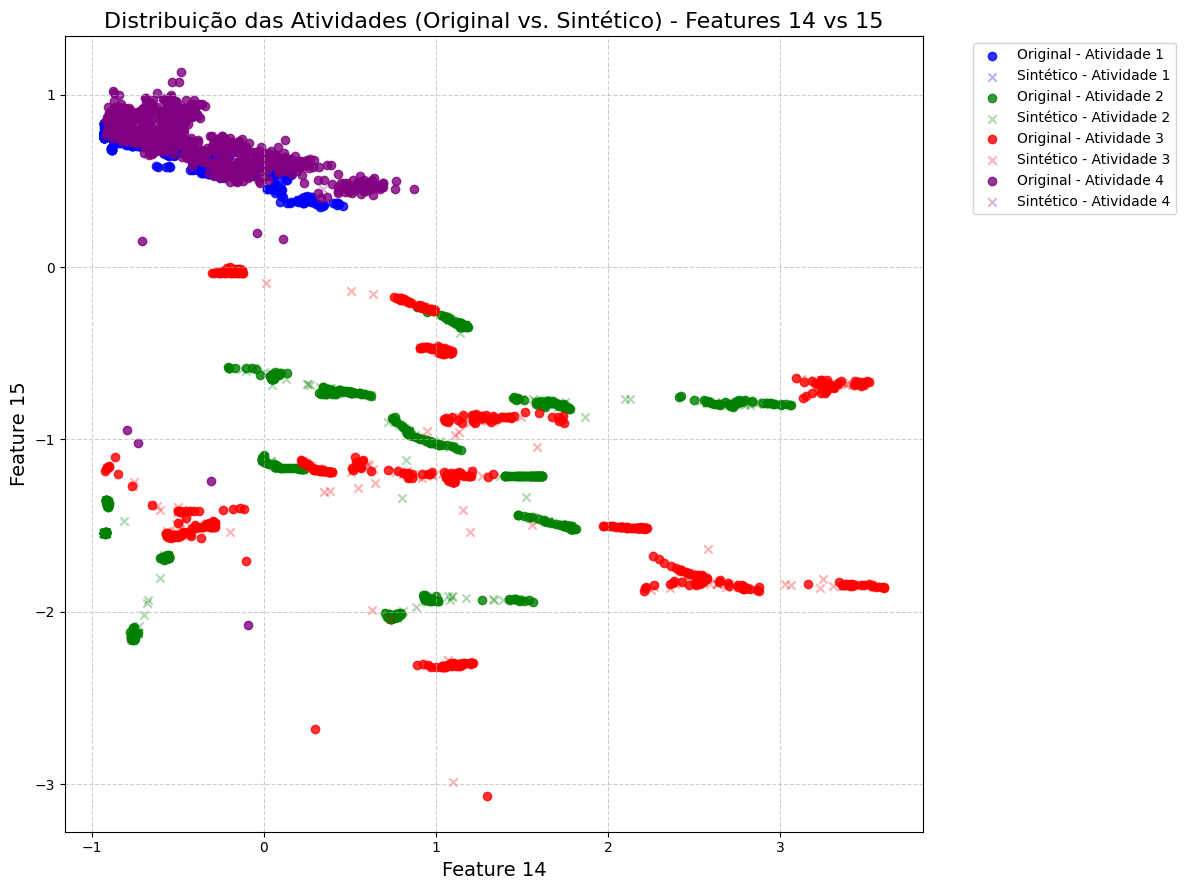

In [134]:
feature_x_col = 14
feature_y_col = 15
target_col = -1 

colors = {
    1: 'blue',
    2: 'green',
    3: 'red',
    4: 'purple'
}

unique_activities = np.sort(np.unique(combined_original_data[:, target_col]))

plt.figure(figsize=(12, 9))

for activity_id in unique_activities:
    mask_original = combined_original_data[:, target_col] == activity_id
    original_data_activity = combined_original_data[mask_original]

    mask_synthetic = combined_synthetic_data[:, target_col] == activity_id
    synthetic_data_activity = combined_synthetic_data[mask_synthetic]

    plt.scatter(
        original_data_activity[:, feature_x_col],
        original_data_activity[:, feature_y_col],
        color=colors[activity_id],
        marker='o',
        alpha=0.8, 
        label=f'Original - Atividade {int(activity_id)}' 
    )

    plt.scatter(
        synthetic_data_activity[:, feature_x_col],
        synthetic_data_activity[:, feature_y_col],
        color=colors[activity_id], 
        marker='x', 
        alpha=0.3, 
        label=f'Sintético - Atividade {int(activity_id)}' 
    )

plt.title(f'Distribuição das Atividades (Original vs. Sintético) - Features {feature_x_col} vs {feature_y_col}', fontsize=16)
plt.xlabel(f'Feature {feature_x_col}', fontsize=14)
plt.ylabel(f'Feature {feature_y_col}', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') #
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout() 
plt.show()

# 6 - Data Splitting

- Merged data (original + synthetic)

In [135]:
merged_data = np.vstack((combined_original_data, combined_synthetic_data))

print("Shape of merged_full_data (with IDs and target):", merged_data.shape)
print("First 5 rows of merged_full_data:\n", merged_data[:5])
print("Last 5 rows of merged_full_data (should be synthetic):\n", merged_data[-5:])

Shape of merged_full_data (with IDs and target): (4576, 141)
First 5 rows of merged_full_data:
 [[ 0.00000000e+00  6.71004380e-01  6.65697019e-01 -5.37778581e-01
  -4.28326684e-01 -7.54865691e-01  2.02034806e-01 -3.19978904e-01
  -1.84473052e-01 -5.30547118e-01 -3.43669644e-01 -7.26423695e-01
  -4.30124356e-01 -5.30567384e-01 -7.07269212e-01  6.97687529e-01
   7.28512905e-01 -5.60651075e-01 -2.75516290e-01  6.81049583e-01
   2.36962501e-02 -1.43306864e+00 -2.65941026e-01 -5.08910035e-01
  -6.40926623e-02 -6.33530677e-01 -4.14973460e-01 -7.89238006e-01
   6.96778460e-01 -5.54674622e-01 -5.81391582e-01 -3.98382647e-01
  -4.67781210e-01 -5.91645716e-01 -2.14002211e-01  1.15801566e+00
  -5.09796537e-01 -2.95016077e-01 -3.39982130e-01 -1.03363335e+00
  -4.96115865e-01 -5.76301591e-01 -6.38668014e-01  1.08054005e-01
   3.37008405e-02 -4.91666782e-01 -3.83524977e-01 -5.23168179e-01
   1.09508004e-02 -2.12706536e+00  1.08563617e+00 -5.15041597e-01
   1.23327143e+00 -4.22105694e-01  9.59174101e

## 6.1 - TVT split 60%-20%20%

- 60% will be used to train the model
- 20% will be used for tuning the hyperparameters and preventing overfitting during training
- 20% will be used the final model evaluation

- Isolate data by participant, so all participant data is present on each set 

- Check the cutoffs

- Train-Validation-Test

In [136]:
def get_participant_indices(participant_ids):
    participants_indices = {}
    unique_pids = np.sort(np.unique(participant_ids))

    for pid in unique_pids:
        indices_for_pid = np.where(participant_ids == pid)[0]
        if indices_for_pid.size > 0:
            start_idx = indices_for_pid.min()
            end_idx = indices_for_pid.max()
            participants_indices[int(pid)] = (start_idx, end_idx)

    return participants_indices


def get_participant_cutoffs(participant_ids):
    participants_cutoffs = {}
    unique_pids = np.sort(np.unique(participant_ids))

    for pid in unique_pids:
        participant_data_block_indices = np.where(participant_ids == pid)[0]
        Ni = len(participant_data_block_indices)

        if Ni == 0:
            continue

        cutoff_60_relative = int(np.ceil(0.60 * Ni))
        cutoff_80_relative = int(np.ceil(0.80 * Ni))

        absolute_idx_60_cutoff = (
            participant_data_block_indices[cutoff_60_relative - 1]
            if cutoff_60_relative > 0 else -1
        )
        absolute_idx_80_cutoff = (
            participant_data_block_indices[cutoff_80_relative - 1]
            if cutoff_80_relative > 0 else -1
        )

        participants_cutoffs[int(pid)] = {
            "Ni": Ni,
            "60_percent_cutoff_idx": absolute_idx_60_cutoff,
            "80_percent_cutoff_idx": absolute_idx_80_cutoff,
        }

    return participants_cutoffs



def split_within_subject(participant_ids):
    participants_indices = get_participant_indices(participant_ids)
    participants_cutoffs = get_participant_cutoffs(participant_ids)
    unique_pids = np.sort(np.unique(participant_ids))

    train_indices, val_indices, test_indices = [], [], []

    for pid in unique_pids:
        pid = int(pid)
        info = participants_cutoffs[pid]
        start_idx, end_idx = participants_indices[pid]
        idx_60 = info['60_percent_cutoff_idx']
        idx_80 = info['80_percent_cutoff_idx']

        # Train = from start to 60%
        train_indices.extend(range(start_idx, idx_60 + 1))
        # Validation = from 60% to 80%
        val_indices.extend(range(idx_60 + 1, idx_80 + 1))
        # Test = from 80% to end
        test_indices.extend(range(idx_80 + 1, end_idx + 1))

    return np.array(train_indices), np.array(val_indices), np.array(test_indices)



## 6.2 - 9 subjects for training, 3 subjects for validation and 3 subjects for test

- It tests your model’s ability to generalize to unseen participants, not just unseen time segments.

In [ ]:
def split_by_subject(participant_ids, subject_split=(9, 3, 3), random_seed=42):
    participants_indices = get_participant_indices(participant_ids)
    unique_pids = np.sort(np.unique(participant_ids))

    np.random.seed(random_seed)
    np.random.shuffle(unique_pids)

    n_train, n_val, n_test = subject_split
    train_pids = unique_pids[:n_train]
    val_pids = unique_pids[n_train:n_train + n_val]
    test_pids = unique_pids[n_train + n_val:n_train + n_val + n_test]

    train_indices, val_indices, test_indices = [], [], []

    for pid in train_pids:
        start_idx, end_idx = participants_indices[int(pid)]
        train_indices.extend(range(start_idx, end_idx + 1))
    for pid in val_pids:
        start_idx, end_idx = participants_indices[int(pid)]
        val_indices.extend(range(start_idx, end_idx + 1))
    for pid in test_pids:
        start_idx, end_idx = participants_indices[int(pid)]
        test_indices.extend(range(start_idx, end_idx + 1))

    return np.array(train_indices), np.array(val_indices), np.array(test_indices)


## 6.3 - Function fro True labels and Predicted labels + Classification Metrics

In [138]:
def compute_classification_metrics(y_true, y_pred, average='weighted', labels=None):

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average=average, zero_division=0)
    rec = recall_score(y_true, y_pred, average=average, zero_division=0)
    f1 = f1_score(y_true, y_pred, average=average, zero_division=0)
    report = classification_report(y_true, y_pred, labels=labels, zero_division=0, output_dict=True)
    
    metrics = {
        "accuracy": acc,
        "precision": prec,
        "recall": rec,
        "f1_score": f1,
        "confusion_matrix": cm,
        "classification_report": pd.DataFrame(report).transpose()
    }
    
    return metrics


# 7 - KNN Implementation

In [139]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def manhattan_distance(x1, x2):
    return np.sum(np.abs(x1 - x2))

def knn_predict(X_train, y_train, X_test, k=3, distance_metric='euclidean'):
    y_pred = []
    for x_test in X_test:
        if distance_metric == 'euclidean':
            distances = np.sqrt(np.sum((X_train - x_test) ** 2, axis=1))
        elif distance_metric == 'manhattan':
            distances = np.sum(np.abs(X_train - x_test), axis=1)
        else:
            raise ValueError("Unsupported distance metric: choose 'euclidean' or 'manhattan'")
        
        k_indices = np.argsort(distances)[:k]
        
        k_labels = y_train[k_indices]
        most_common = Counter(k_labels).most_common(1)[0][0]
        y_pred.append(most_common)
    
    return np.array(y_pred)

def knn_score(X_train, y_train, X_test, y_test, k=3, distance_metric='euclidean'):
    y_pred = knn_predict(X_train, y_train, X_test, k, distance_metric)
    return np.mean(y_pred == y_test)


# 8 - Evaluation

## 8.1 a-Using all features

- within subjects

In [140]:
train_idx, val_idx, test_idx = split_within_subject(participant_ids_original)

print(f"Train size: {len(train_idx)} | Val size: {len(val_idx)} | Test size: {len(test_idx)}")

Train size: 2113 | Val size: 702 | Test size: 697


In [141]:
# Train set
X_train, y_train = X[train_idx], y[train_idx]

# Validation set
X_val, y_val = X[val_idx], y[val_idx]

# Test set
X_test, y_test = X[test_idx], y[test_idx]

In [142]:
k = 3  
distance_metric = 'euclidean' 

y_val_pred = knn_predict(X_train, y_train, X_val, k=k, distance_metric=distance_metric)

y_test_pred = knn_predict(X_train, y_train, X_test, k=k, distance_metric=distance_metric)

val_accuracy = knn_score(X_train, y_train, X_val, y_val, k=k, distance_metric=distance_metric)
test_accuracy = knn_score(X_train, y_train, X_test, y_test, k=k, distance_metric=distance_metric)

print(f"Validation Accuracy: {val_accuracy:.3f}")
print(f"Test Accuracy: {test_accuracy:.3f}")

Validation Accuracy: 0.980
Test Accuracy: 0.994


- 9/3/3 subjects split

In [143]:
train_idx, val_idx, test_idx = split_by_subject(participant_ids_original, subject_split=(9, 3, 3))

print(f"Train size: {len(train_idx)} | Val size: {len(val_idx)} | Test size: {len(test_idx)}")

Train size: 2106 | Val size: 696 | Test size: 710


In [144]:
# Train set
X_train, y_train = X[train_idx], y[train_idx]

# Validation set
X_val, y_val = X[val_idx], y[val_idx]

# Test set
X_test, y_test = X[test_idx], y[test_idx]

In [145]:
k = 3  
distance_metric = 'euclidean' 

y_val_pred = knn_predict(X_train, y_train, X_val, k=k, distance_metric=distance_metric)

y_test_pred = knn_predict(X_train, y_train, X_test, k=k, distance_metric=distance_metric)

val_accuracy = knn_score(X_train, y_train, X_val, y_val, k=k, distance_metric=distance_metric)
test_accuracy = knn_score(X_train, y_train, X_test, y_test, k=k, distance_metric=distance_metric)

print(f"Validation Accuracy: {val_accuracy:.3f}")
print(f"Test Accuracy: {test_accuracy:.3f}")

Validation Accuracy: 0.917
Test Accuracy: 0.799


## 8.1 b-PCA-Transformed features

In [147]:
X_pca_75, _, _ = pca(X_zscore, dimensions_needed)
print(X_pca_75.shape)
# smoothed_X_pca = gaussian_filter1d(X_pca_75_variance, sigma=1.0, axis=0)

(3512, 17)


- within subjects

In [148]:
train_idx, val_idx, test_idx = split_within_subject(participant_ids_original)

print(f"Train size: {len(train_idx)} | Val size: {len(val_idx)} | Test size: {len(test_idx)}")

Train size: 2113 | Val size: 702 | Test size: 697


In [150]:
# Train set
X_train, y_train = X_pca_75[train_idx], y[train_idx]

# Validation set
X_val, y_val = X_pca_75[val_idx], y[val_idx]

# Test set
X_test, y_test = X_pca_75[test_idx], y[test_idx]

In [151]:
k = 3  
distance_metric = 'euclidean' 

y_val_pred = knn_predict(X_train, y_train, X_val, k=k, distance_metric=distance_metric)

y_test_pred = knn_predict(X_train, y_train, X_test, k=k, distance_metric=distance_metric)

val_accuracy = knn_score(X_train, y_train, X_val, y_val, k=k, distance_metric=distance_metric)
test_accuracy = knn_score(X_train, y_train, X_test, y_test, k=k, distance_metric=distance_metric)

print(f"Validation Accuracy: {val_accuracy:.3f}")
print(f"Test Accuracy: {test_accuracy:.3f}")

Validation Accuracy: 0.964
Test Accuracy: 0.990


- 9/3/3

In [152]:
train_idx, val_idx, test_idx = split_by_subject(participant_ids_original, subject_split=(9, 3, 3))

print(f"Train size: {len(train_idx)} | Val size: {len(val_idx)} | Test size: {len(test_idx)}")

Train size: 2106 | Val size: 696 | Test size: 710


In [153]:
# Train set
X_train, y_train = X_pca_75[train_idx], y[train_idx]

# Validation set
X_val, y_val = X_pca_75[val_idx], y[val_idx]

# Test set
X_test, y_test = X_pca_75[test_idx], y[test_idx]

In [154]:
k = 3  
distance_metric = 'euclidean' 

y_val_pred = knn_predict(X_train, y_train, X_val, k=k, distance_metric=distance_metric)

y_test_pred = knn_predict(X_train, y_train, X_test, k=k, distance_metric=distance_metric)

val_accuracy = knn_score(X_train, y_train, X_val, y_val, k=k, distance_metric=distance_metric)
test_accuracy = knn_score(X_train, y_train, X_test, y_test, k=k, distance_metric=distance_metric)

print(f"Validation Accuracy: {val_accuracy:.3f}")
print(f"Test Accuracy: {test_accuracy:.3f}")

Validation Accuracy: 0.869
Test Accuracy: 0.868
